**Overview** - Retailkart.com is a small and medium-scale organization that deals in wine, fruit and meat products, holding around 35% offline market share. The company has been leading the domain offline for a long time. Due to increased competition, they decided to move online as well. But there are many challenges that the company has to overcome to stay competitive in the market. For this purpose, you will solve a customer segmentation problem based on customers’ preferences and purchase behaviour. You will also build a model to predict churn rate and improve customer acquisition by a reasonable threshold.

We need to solve two primary objectives:

1. Customer segmentation
2. Churn prediction

### Customer segmentation
With personalisation, the conversion rates are expected to improve by a maximum of 1% for each of the cohorts. 

The conversion rate could vary based on the accuracy or correctness of the segmentation and would be directly linked to the silhouette coefficient. The silhouette coefficient ranges from -1 to 1. Also, the business impact would be directly proportional to this coefficient.

Business Objective is to find the customer groups to eventually provide a preference based user experience at a group level.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import matplotlib.cm as cm
from sklearn.decomposition import PCA

# **Data Understanding and Preparation**

---



In [2]:
# Upload and read the dataset

retailKart_df = pd.read_csv(r'C:\Users\pragy\Downloads\CustomerPurchaseData.csv')
retailKart_df.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    13/11/12       59         6  ...                  8             0   
1    10/12/13       94         1  ...                  5             0   
2    08/08/12       31         0  ...                  8             0   
3    15/06/14       80         1  ...                  6             0   
4    09/09/12       52         1  ...                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11       0.0  
1              3         11       0.0  
2              3         11       0.0  
3              3         11       0.0  
4              3         11       0.0  

[5 rows x 29 columns]

In [3]:
retailKart_df.shape

(2239, 29)

In [4]:
# Info of the dataset

retailKart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [5]:
numCols = retailKart_df.select_dtypes("number").columns

In [6]:
len(numCols)

26

In [7]:
catCols = retailKart_df.select_dtypes("object").columns

In [8]:
catCols

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [9]:
# Check the missing values if any

retailKart_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  1
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64

In [10]:
# Dropping columns as they are not a key contributor for the analysis

retailKart_df=retailKart_df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
retailKart_df.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0    13/11/12       59         6  ...                    0                  3   
1    10/12/13       94         1  ...                    0                  3   
2    08/08/12       31         0  ...                    0                  3   
3    15/06/14       80         1  ...                    0                  3   
4    09/09/12       52         1  ...                    1                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  8             0             0             0             0   
1                  5             0             0             0             0   
2                  8             0             0             0             0   
3                  6             0             0             0             0   
4                  6             1             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0       0.0  
1             0         0       0.0  
2             0         0       0.0  
3             0         0       0.0  
4             0         0       0.0  

[5 rows x 27 columns]

In [11]:
# Missing value treatment for "Income"

retailKart_df['Income'] = retailKart_df['Income'].fillna(0)

In [12]:
# Missing value treatment for "Response"

def checkResponse(retailKart_df):
    if (retailKart_df['AcceptedCmp1'] > 0 or retailKart_df['AcceptedCmp2'] > 0 or retailKart_df['AcceptedCmp3'] > 0 or retailKart_df['AcceptedCmp4'] > 0 or retailKart_df['AcceptedCmp5'] > 0):
        return 1
    else:
        return 0

In [13]:
retailKart_df['Response_Temp'] = retailKart_df.apply(checkResponse, axis=1)

In [14]:
retailKart_df.head(10)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   
5  4669        1981     Basic        Married  24480.0        1         0   
6  8234        1973     Basic       Together  27190.0        1         0   
7  8151        1990     Basic        Married  24279.0        0         0   
8  2457        1975     Basic        Married  30801.0        0         1   
9  6682        1973     Basic        Married  18978.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    13/11/12       59         6  ...                  3                  8   
1    10/12/13       94         1  ...                  3                  5   
2    08/08/12       31         0  ...                  3                  8   
3    15/06/14       80         1  ...                  3                  6   
4    09/09/12       52         1  ...                  2                  6   
5    11/02/13       46         4  ...                  4                  7   
6    15/08/13       13         1  ...                  2                  8   
7    29/12/12        6        16  ...                  3                  8   
8    26/10/12       23         8  ...                  3                  7   
9    11/12/12       41         2  ...                  3                  8   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   
5             0             0             0             0             0   
6             1             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             0             0   

   Complain  Response  Response_Temp  
0         0       0.0              0  
1         0       0.0              0  
2         0       0.0              0  
3         0       0.0              0  
4         0       0.0              1  
5         0       0.0              0  
6         0       1.0              1  
7         0       0.0              0  
8         0       0.0              0  
9         0       0.0              0  

[10 rows x 28 columns]

In [15]:
retailKart_df[retailKart_df['Response'].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
70     5255        1986  Graduation         Single     1.0        0         0   
78     7244        1951  Graduation         Single     2.0        1         0   
85     8557        1982  Graduation         Single     1.0        0         0   
105    9235        1957  Graduation         Single     1.0        1         0   
124   35034        1963  Graduation        Married     0.0        1         0   
213    2437        1989  Graduation        Married     0.0        0         0   
218    2863        1970  Graduation         Single     1.0        2         0   
748    2902        1958  Graduation       Together     1.0        1         0   
1101   5079        1971  Graduation        Married     1.0        1         0   
1103   3117        1955  Graduation         Single     0.0        1         0   
1197   5798        1973      Master       Together     0.0        0         0   
1405  27494        1970      Master       Together     0.0        1         0   
1515   7187        1969      Master       Together     1.0        1         0   
1517  14314        1954      Master       Together     0.0        1         0   
1518   5250        1943      Master          Widow     0.0        0         0   
1562   7281        1959         PhD         Single     0.0        0         0   
1567   8996        1957         PhD        Married     2.0        1         0   
1574   8268        1961         PhD        Married     0.0        1         0   
1856   3769        1972         PhD       Together     1.0        0         0   
2010  45276        1981         PhD         Single     1.0        0         0   
2040  47279        1973       Cycle        Married     1.0        0         0   
2163   4345        1964       Cycle         Single     1.0        1         0   
2238   8720        1978       Cycle       Together     0.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
70      20/02/13       19         5  ...                  0   
78      01/01/14       96        48  ...                  4   
85      17/06/13       57        11  ...                  3   
105     27/05/14       45         7  ...                  2   
124     11/08/13       96       231  ...                  7   
213     03/06/13       69       861  ...                 12   
218     23/08/13       67       738  ...                 10   
748     03/09/12       87        19  ...                  3   
1101    03/03/13       82        71  ...                  3   
1103    18/10/13       95       264  ...                  5   
1197    23/11/13       87       445  ...                  8   
1405    01/04/13       39       187  ...                  6   
1515    18/05/13       52       375  ...                  4   
1517    23/06/13       83       161  ...                  4   
1518    30/10/13       75       532  ...                 11   
1562    05/11/13       80        81  ...                  4   
1567    19/11/12        4       230  ...                  8   
1574    11/07/13       23       352  ...                  7   
1856    02/03/14       17        25  ...                  3   
2010    31/05/13       82        23  ...                  3   
2040    14/09/12       25        25  ...                  3   
2163    12/01/14       49         5  ...                  2   
2238    12/08/12       53        32  ...                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
70                    1             0             0             0   
78                    6             0             0             0   
85                    6             0             0             0   
105                   7             0             0             0   
124                   4             0             0             0   
213                   3             0             1             0   
218                   7             0             1             0   

In [16]:
retailKart_df.Response.fillna(retailKart_df.Response_Temp, inplace=True)

In [17]:
retailKart_df[retailKart_df['Response'].isna()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntSnacksProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Response_Temp]
Index: []

[0 rows x 28 columns]

# **EDA & Feature Engineering**

---



In [18]:
numCols = retailKart_df.select_dtypes("number").columns

C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pragy\anaconda3\lib\si

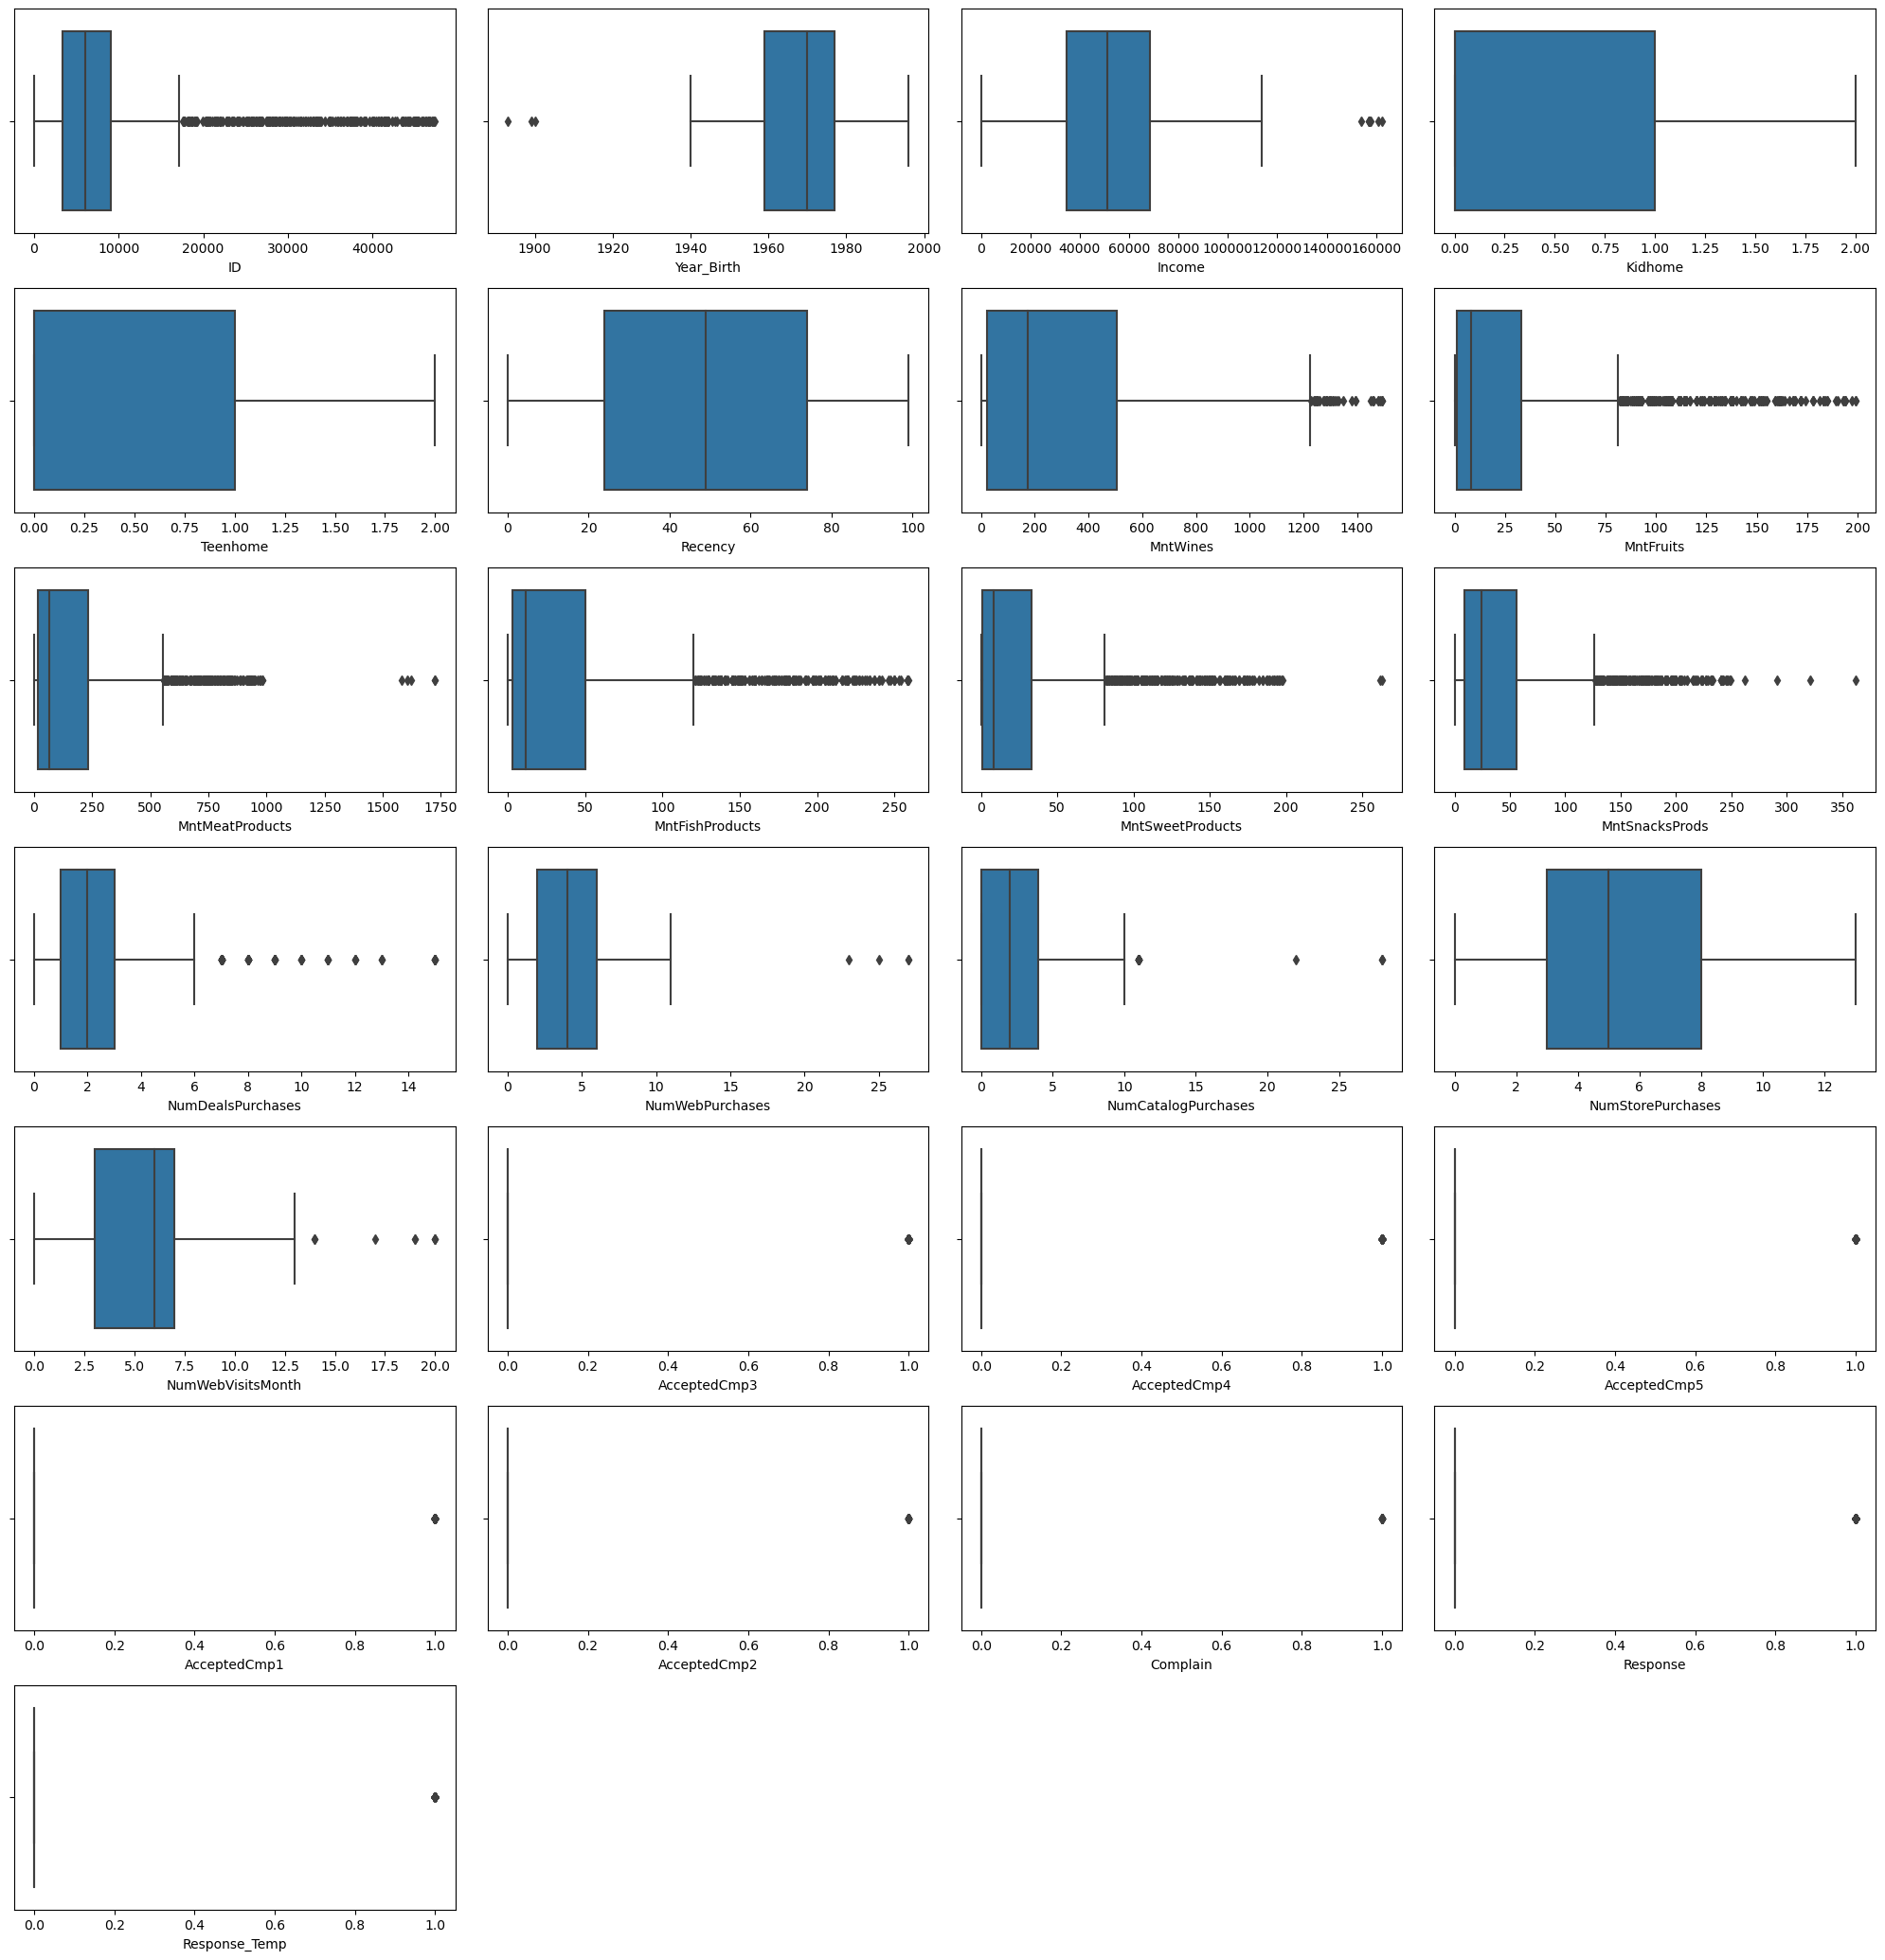

In [19]:
# Outlier detection

fig = plt.figure(figsize=(20,100))
for i in range(len(numCols)):
    fig.add_subplot(34, 4, i+1)
#     sns.boxplot(y=retailKart_df.loc[:, numCols].iloc[:,i],x=retailKart_df['churn'])
    sns.boxplot(retailKart_df.loc[:, numCols].iloc[:,i])
plt.tight_layout()
plt.show()

In [20]:
retailKart_df['Dt_Customer'] = pd.to_datetime(retailKart_df.Dt_Customer)
retailKart_df['LoyaltyAsOn'] = '01-01-2015'
retailKart_df['LoyaltyAsOn'] = pd.to_datetime(retailKart_df.LoyaltyAsOn)
retailKart_df['LoyalSince'] = (retailKart_df['LoyaltyAsOn'] - retailKart_df['Dt_Customer']).dt.days

In [21]:
retailKart_df['Age'] = 2015 - retailKart_df["Year_Birth"]

In [22]:
retailKart_df["Income"].describe(percentiles=[0.99])

count      2239.000000
mean      51412.799464
std       22069.566611
min           0.000000
50%       51039.000000
99%       94384.000000
max      162397.000000
Name: Income, dtype: float64

In [23]:
retailKart_df["Age"].describe(percentiles=[0.99])

count    2239.000000
mean       46.197856
std        11.985494
min        19.000000
50%        45.000000
99%        70.000000
max       122.000000
Name: Age, dtype: float64

In [24]:
# Outlier Treatment

retailKart_df = retailKart_df[(retailKart_df["Age"]<100)]
retailKart_df = retailKart_df[(retailKart_df["Income"]<100000)]
print("The total number of data-points after removing the outliers are:", len(retailKart_df))

The total number of data-points after removing the outliers are: 2224


In [25]:
retailKart_df['Parent'] = retailKart_df['Kidhome'] + retailKart_df['Teenhome']

In [26]:
retailKart_df["Parent"] = np.where(retailKart_df.Parent> 0, 1, 0)

In [27]:
# Simplifying Education 

retailKart_df['Education'] = retailKart_df['Education'].replace(['PhD','Cycle','Graduation', 'Master'],'PG')  
retailKart_df['Education'] = retailKart_df['Education'].replace(['Basic'], 'UG')

In [28]:
retailKart_df['Marital_Status'] = retailKart_df['Marital_Status'].replace(['Married', 'Together'],'Not_Single')
retailKart_df['Marital_Status'] = retailKart_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [29]:
# Feature indicating total children living in the household

retailKart_df["Kids"]=retailKart_df["Kidhome"]+retailKart_df["Teenhome"]

In [30]:
# Feature to derive Family Size

retailKart_df["FamilySize"]=retailKart_df["Marital_Status"].replace({"Single": 1, "Not_Single":2})+ retailKart_df["Kids"]


In [31]:
# Total spendings on various items

retailKart_df["customerSpending"] = retailKart_df["MntWines"]+ retailKart_df["MntFruits"]+ retailKart_df["MntMeatProducts"]+ retailKart_df["MntFishProducts"]+ retailKart_df["MntSweetProducts"]

In [32]:
# Arrive at different product categories

retailKart_df['Liquor'] = retailKart_df['MntWines']

In [33]:
retailKart_df['Meat'] = retailKart_df['MntFishProducts'] + retailKart_df['MntMeatProducts']

In [34]:
retailKart_df['Snacks & Fruits'] = retailKart_df['MntSnacksProds'] + retailKart_df['MntSweetProducts'] + retailKart_df['MntFruits']

In [35]:
retailKart_df=retailKart_df.drop(columns=["ID", "Dt_Customer", "Year_Birth","LoyaltyAsOn"],axis=1)
retailKart_df.shape

(2224, 34)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

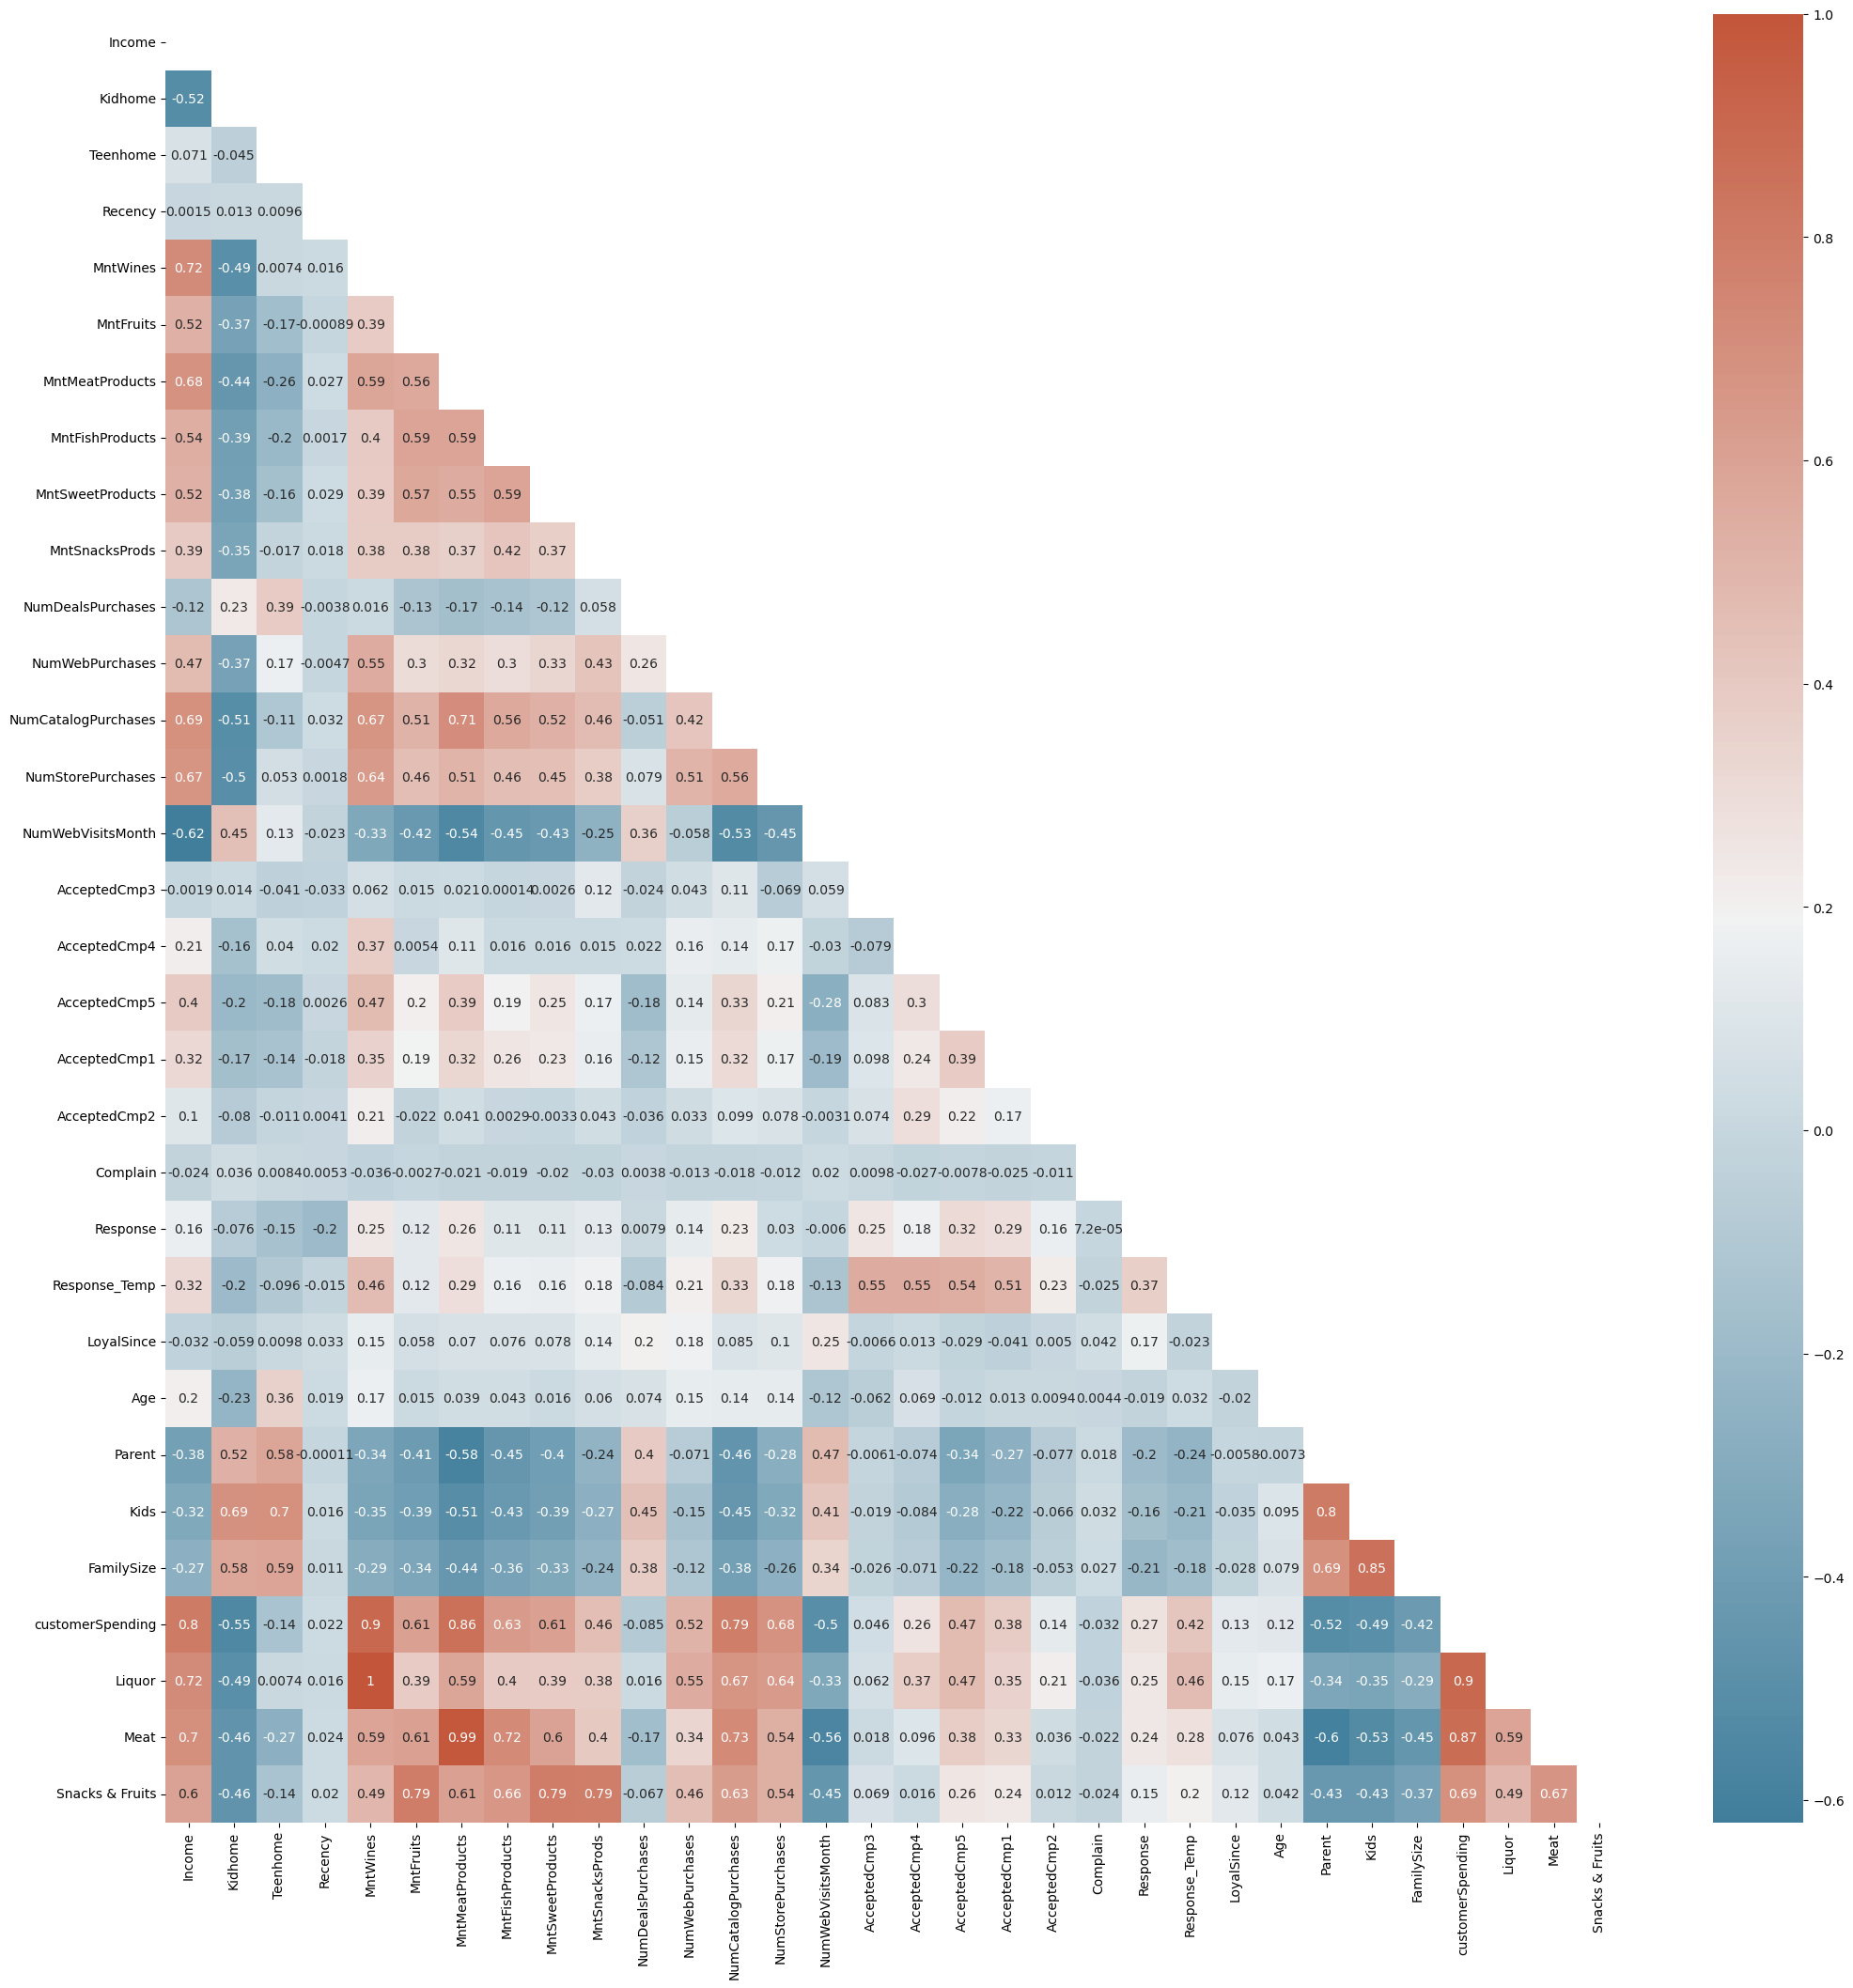

In [36]:
# Correlation between different variables

corr = retailKart_df.corr()

# Set up the matplotlib plot configuration

f, ax = plt.subplots(figsize=(25, 25))

# Generate a mask for upper traingle

mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

plt.tight_layout

In [37]:
retailKart_df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0        UG     Not_Single   7500.0        0         0       59         6   
1        UG     Not_Single  24594.0        1         0       94         1   
2        UG         Single   9548.0        1         0       31         0   
3        UG     Not_Single  28249.0        0         0       80         1   
4        UG     Not_Single  24882.0        1         0       52         1   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Response_Temp  \
0         16               11               11  ...              0   
1          3                6               10  ...              0   
2          1                3               10  ...              0   
3          9                7                2  ...              0   
4          4               10               29  ...              1   

   LoyalSince  Age  Parent  Kids  FamilySize  customerSpending  Liquor  Meat  \
0         779   39       0     0           2                45       6    22   
1         446   36       1     1           3                20       1    16   
2         876   39       1     1           2                20       0    13   
3         200   54       0     0           2                33       1     9   
4         844   37       1     1           3                44       1    39   

   Snacks & Fruits  
0               33  
1               12  
2               16  
3               33  
4               40  

[5 rows x 34 columns]

In [38]:
numCols = retailKart_df.select_dtypes("number").columns
catCols = retailKart_df.select_dtypes("object").columns

In [39]:
numCols

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Response_Temp', 'LoyalSince',
       'Age', 'Parent', 'Kids', 'FamilySize', 'customerSpending', 'Liquor',
       'Meat', 'Snacks & Fruits'],
      dtype='object')

In [40]:
catCols

Index(['Education', 'Marital_Status'], dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [42]:
# Encoding technique to convert categorical features to numerical features for model building

lbl_encode = LabelEncoder()
for i in catCols:
    retailKart_df[i]=retailKart_df[[i]].apply(lbl_encode.fit_transform)

In [43]:
retailKart_mdl_build = retailKart_df.copy()

In [44]:
retailKart_mdl_build.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0   7500.0        0         0       59         6   
1          1               0  24594.0        1         0       94         1   
2          1               1   9548.0        1         0       31         0   
3          1               0  28249.0        0         0       80         1   
4          1               0  24882.0        1         0       52         1   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Response_Temp  \
0         16               11               11  ...              0   
1          3                6               10  ...              0   
2          1                3               10  ...              0   
3          9                7                2  ...              0   
4          4               10               29  ...              1   

   LoyalSince  Age  Parent  Kids  FamilySize  customerSpending  Liquor  Meat  \
0         779   39       0     0           2                45       6    22   
1         446   36       1     1           3                20       1    16   
2         876   39       1     1           2                20       0    13   
3         200   54       0     0           2                33       1     9   
4         844   37       1     1           3                44       1    39   

   Snacks & Fruits  
0               33  
1               12  
2               16  
3               33  
4               40  

[5 rows x 34 columns]

# **Standardization**

---



In [45]:
# Features standardization to have feature values' mean to 0 and variance to 1

scaled_features = StandardScaler().fit_transform(retailKart_mdl_build.values)
scaled_features_df = pd.DataFrame(scaled_features, index=retailKart_mdl_build.index, columns=retailKart_mdl_build.columns)

In [46]:
len(scaled_features_df)

2224

In [47]:
scaled_features_df.head()

Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0   6.339179       -0.742231 -2.054924 -0.827672 -0.923372  0.340738   
1   6.339179       -0.742231 -1.246379  1.031664 -0.923372  1.550125   
2   6.339179        1.347290 -1.958054  1.031664 -0.923372 -0.626771   
3   6.339179       -0.742231 -1.073498 -0.827672 -0.923372  1.066370   
4   6.339179       -0.742231 -1.232757  1.031664 -0.923372  0.098861   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  Response_Temp  \
0 -0.887257  -0.258580        -0.703222        -0.486345  ...      -0.509257   
1 -0.902120  -0.587055        -0.726010        -0.504651  ...      -0.509257   
2 -0.905092  -0.637589        -0.739682        -0.504651  ...      -0.509257   
3 -0.902120  -0.435451        -0.721452        -0.651099  ...      -0.509257   
4 -0.902120  -0.561787        -0.707780        -0.156836  ...       1.963643   

   LoyalSince       Age    Parent      Kids  FamilySize  customerSpending  \
0    1.038551 -0.607903 -1.585379 -1.267327   -0.654771         -0.896145   
1   -0.396264 -0.864283  0.630764  0.070374    0.450932         -0.939606   
2    1.456501 -0.607903  0.630764  0.070374   -0.654771         -0.939606   
3   -1.456218  0.673996 -1.585379 -1.267327   -0.654771         -0.917006   
4    1.318620 -0.778823  0.630764  0.070374    0.450932         -0.897883   

     Liquor      Meat  Snacks & Fruits  
0 -0.887257 -0.707716        -0.612749  
1 -0.902120 -0.731194        -0.813525  
2 -0.905092 -0.742932        -0.775282  
3 -0.902120 -0.758584        -0.612749  
4 -0.902120 -0.641197        -0.545824  

[5 rows x 34 columns]

In [48]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
import pandas as pd
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [49]:
scaled_features_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntSnacksProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Response_Temp', 'LoyalSince', 'Age', 'Parent',
       'Kids', 'FamilySize', 'customerSpending', 'Liquor', 'Meat',
       'Snacks & Fruits'],
      dtype='object')

# Check for Clustering Applicability

In [50]:
# Using the Hopkins Statistic function by passing the above dataframe as a parameter

hopkins(scaled_features_df)

0.8735074549971883

In [51]:
len(scaled_features_df)

2224

# **Handle Dimensionality**

---



In [52]:
# Initiating PCA to reduce dimentions. Let's limit to 3

pca = PCA(n_components=3)
pca.fit(scaled_features_df)
principal_retailKart_df = pd.DataFrame(pca.transform(scaled_features_df), columns=(["principal component 1","principal component 2", "principal component 3"]))
principal_retailKart_df.describe().T

count          mean       std       min       25%  \
principal component 1  2224.0 -2.701676e-16  3.312488 -5.878241 -2.902378   
principal component 2  2224.0 -6.809102e-17  1.779621 -4.906868 -1.346655   
principal component 3  2224.0  5.591051e-17  1.592178 -4.284203 -0.914810   

                            50%       75%        max  
principal component 1 -1.066643  2.534216  10.111084  
principal component 2 -0.081429  1.236724   6.343303  
principal component 3 -0.142517  0.472312   8.318537

In [53]:
len(principal_retailKart_df)

2224

**Identify Number of Clusters using Elbow Method**

---



In [54]:
from sklearn.cluster import KMeans

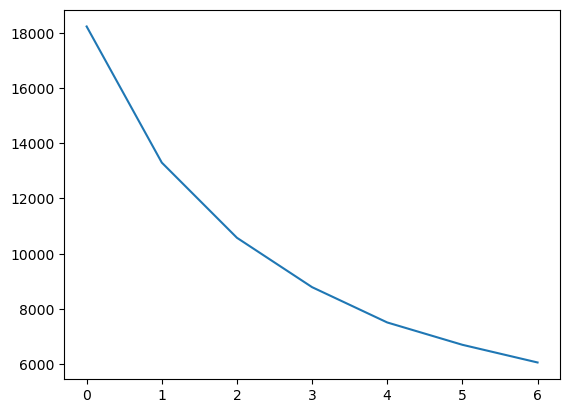

In [55]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(principal_retailKart_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [56]:
!pip install yellowbrick

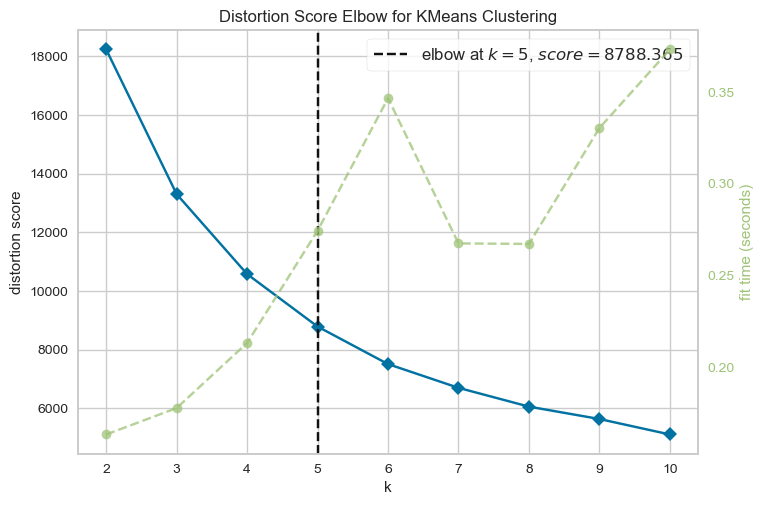

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
# Analyze the optimum number of clusters

from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(principal_retailKart_df)
Elbow_M.show()

# **Model Building**

---



In [58]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(principal_retailKart_df)

KMeans(max_iter=50, n_clusters=5)

In [59]:
kmeans.labels_

array([4, 4, 4, ..., 1, 4, 3])

In [60]:
len(kmeans.labels_)

2224

In [61]:
len(retailKart_df)

2224

In [62]:
# Label Assignment
retailKart_df['cluster_id'] = kmeans.labels_
retailKart_df.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0   7500.0        0         0       59         6   
1          1               0  24594.0        1         0       94         1   
2          1               1   9548.0        1         0       31         0   
3          1               0  28249.0        0         0       80         1   
4          1               0  24882.0        1         0       52         1   

   MntFruits  MntMeatProducts  MntFishProducts  ...  LoyalSince  Age  Parent  \
0         16               11               11  ...         779   39       0   
1          3                6               10  ...         446   36       1   
2          1                3               10  ...         876   39       1   
3          9                7                2  ...         200   54       0   
4          4               10               29  ...         844   37       1   

   Kids  FamilySize  customerSpending  Liquor  Meat  Snacks & Fruits  \
0     0           2                45       6    22               33   
1     1           3                20       1    16               12   
2     1           2                20       0    13               16   
3     0           2                33       1     9               33   
4     1           3                44       1    39               40   

   cluster_id  
0           4  
1           4  
2           4  
3           4  
4           4  

[5 rows x 35 columns]

<AxesSubplot:>

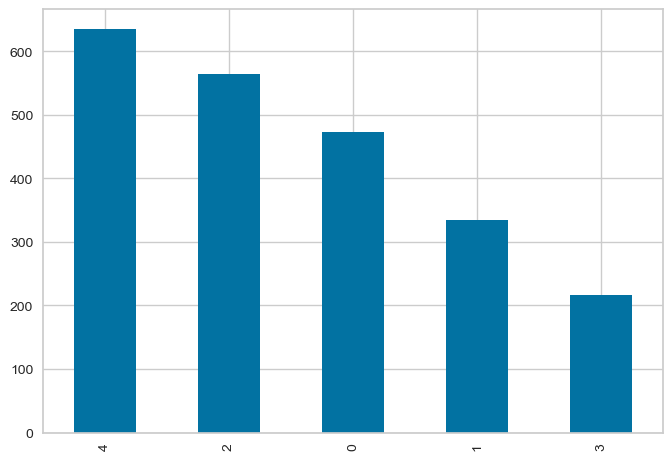

In [63]:
retailKart_df["cluster_id"].value_counts().plot(kind="bar")

# **Customer Segmentation**

---



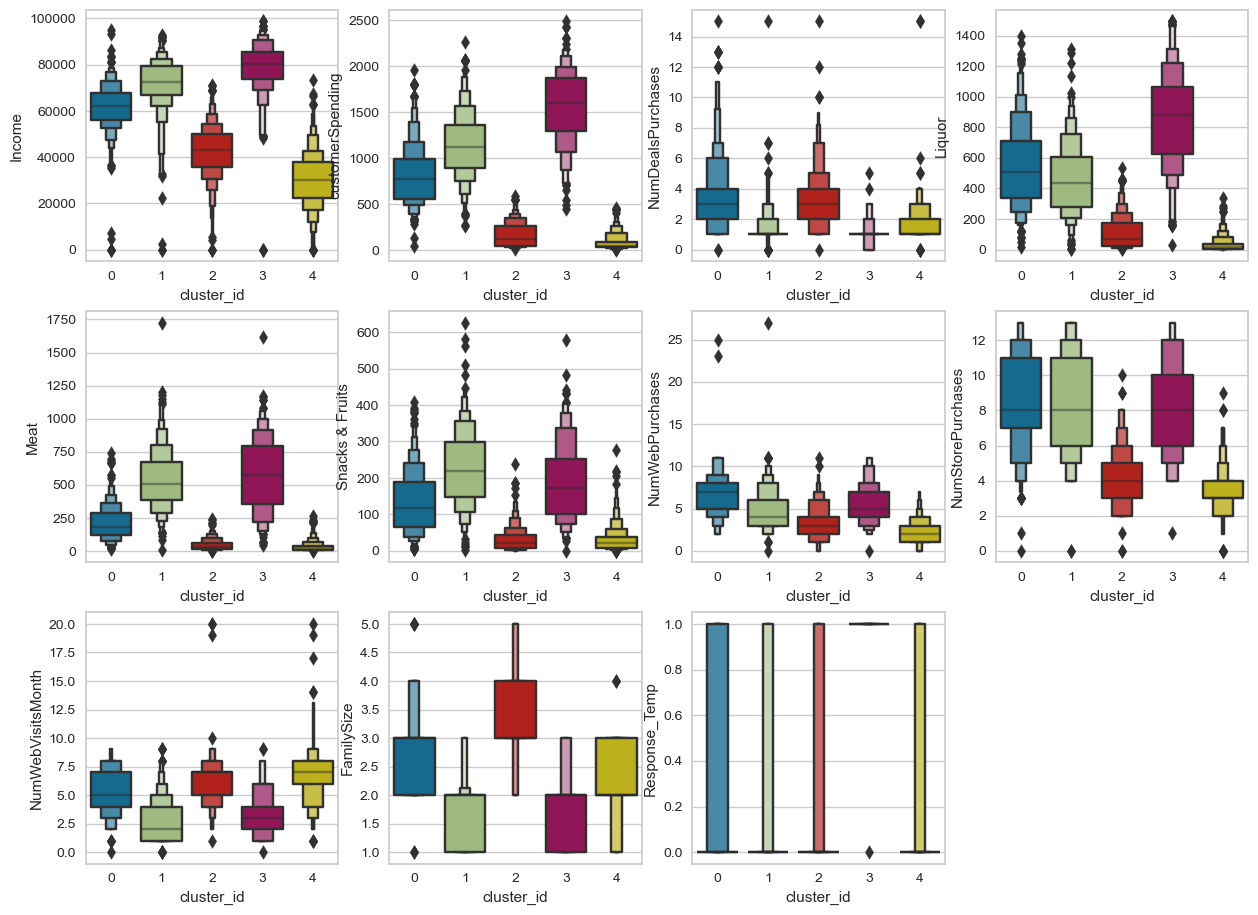

In [64]:
fig = plt.figure(figsize = (15,15))

plt.subplot(4,4,1)
pl=sns.boxenplot(x=retailKart_df["cluster_id"], y=retailKart_df["Income"])

plt.subplot(4,4,2)
sns.boxenplot(x=retailKart_df["cluster_id"], y=retailKart_df["customerSpending"])

plt.subplot(443)
sns.boxenplot(y=retailKart_df["NumDealsPurchases"],x=retailKart_df["cluster_id"])

plt.subplot(444)
sns.boxenplot(y=retailKart_df["Liquor"],x=retailKart_df["cluster_id"])

plt.subplot(445)
sns.boxenplot(y=retailKart_df["Meat"],x=retailKart_df["cluster_id"])

plt.subplot(446)
sns.boxenplot(y=retailKart_df["Snacks & Fruits"],x=retailKart_df["cluster_id"])

plt.subplot(447)
sns.boxenplot(y=retailKart_df["NumWebPurchases"],x=retailKart_df["cluster_id"])

plt.subplot(448)
sns.boxenplot(y=retailKart_df["NumStorePurchases"],x=retailKart_df["cluster_id"])

plt.subplot(449)
sns.boxenplot(y=retailKart_df["NumWebVisitsMonth"],x=retailKart_df["cluster_id"])

plt.subplot(4,4,10)
sns.boxenplot(y=retailKart_df["FamilySize"],x=retailKart_df["cluster_id"])

plt.subplot(4,4,11)
sns.boxenplot(y=retailKart_df["Response_Temp"],x=retailKart_df["cluster_id"])

# plt.tight_layout()
plt.show()


1. Customers purchase are more into liquor, meat, snacks.
 - High income and high spending customers are not bothered about deals with maximum family of 3.
 - Potential customers are encouraged from online purchase.

2. Customers with low income and low spending show interest in web views only with family size between 2 to 3.

3. Customers with decent income and spending show interest in deals and also encouraged towards online purchase with family size between 2 to 3.

4. Customers who are giving consistent revenue are more into online purchase with family size of 1 to 2.

### Churn prediction objective
The objective of predicting customers who are going to churn would be to offer them a TOA (token of appreciation) and prevent them from churning out.

We should be able to identify more customers with a probability of churn, i.e., recall should be high, but not at the cost of introducing many false positives.

In [65]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [66]:
import warnings
warnings.filterwarnings("ignore")

#### Data understanding and Preparation -

In [67]:
# Upload user_app_behaviour dataset

App_user = pd.read_csv(r'C:\Users\pragy\Downloads\User+App+Behaviour.csv')

App_user.head(10)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   
5       50006      1     0.0             Computer         1             22.0   
6       50007      1     NaN                Phone         3             11.0   
7       50008      1     NaN                Phone         1              6.0   
8       50009      1    13.0                Phone         3              9.0   
9       50010      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130  
5                7.0             139  
6                0.0             121  
7                0.0             123  
8                2.0             127  
9                1.0             123

In [68]:
App_user.shape

(5630, 20)

In [69]:
App_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [70]:
App_user.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [71]:
# Delete the unnecessary columns which is not informative

App_user.drop("CustomerID", axis= 1, inplace= True)

In [72]:
# Check the missing values 

App_user.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [73]:
# Fixing the missing values for columns ( tenure, warehousetohome, hourspendonapp, orderamounthikefrom)

# Let's start with the tenure columns 

App_user.Tenure.isnull().sum()

264

In [74]:
# 264 records are missing 

264/5630 * 100   # 4% records are missing

4.6891651865008885

In [75]:
# Check the distribution

App_user["Tenure"].value_counts()

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

In [76]:
App_user.Tenure.describe()

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

In [77]:
# 4% missing is very small amount compared to the dataset size. Let's delete the missing values

App_user1 = App_user[~ App_user["Tenure"].isnull()]

In [78]:
App_user1.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [79]:
App_user1["WarehouseToHome"].value_counts(normalize= True)

9.0      0.104790
8.0      0.081525
7.0      0.073509
16.0     0.059629
14.0     0.055914
15.0     0.052590
10.0     0.052590
6.0      0.050635
13.0     0.045552
11.0     0.043597
17.0     0.041642
12.0     0.041251
22.0     0.019550
31.0     0.018768
35.0     0.018182
32.0     0.017986
30.0     0.017595
23.0     0.017204
18.0     0.017009
25.0     0.016813
24.0     0.016227
26.0     0.015836
21.0     0.015640
29.0     0.015249
27.0     0.014272
20.0     0.013685
19.0     0.013490
28.0     0.012708
33.0     0.012708
34.0     0.011926
36.0     0.009971
5.0      0.001564
126.0    0.000196
127.0    0.000196
Name: WarehouseToHome, dtype: float64

In [80]:
251/App_user1.shape[0]

0.04677599701826314

In [81]:
App_user["WarehouseToHome"].describe()

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

In [82]:
app_median = App_user["WarehouseToHome"].median()

<AxesSubplot:xlabel='WarehouseToHome'>

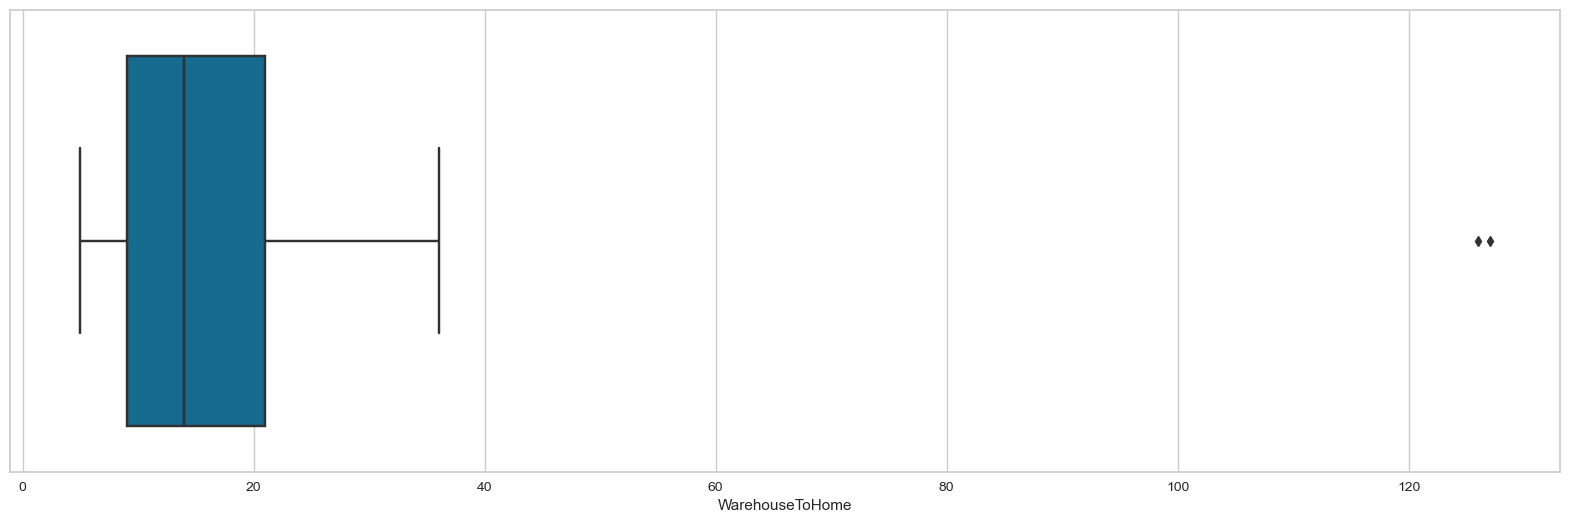

In [83]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['WarehouseToHome'])

In [84]:
# Imputing the missing values with median = 14 

App_user1.WarehouseToHome.fillna(app_median,inplace= True)

In [85]:
App_user1.WarehouseToHome.isnull().sum()

0

In [86]:
App_user1.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [87]:
App_user1.HourSpendOnApp.isnull().sum()

255

<AxesSubplot:xlabel='HourSpendOnApp'>

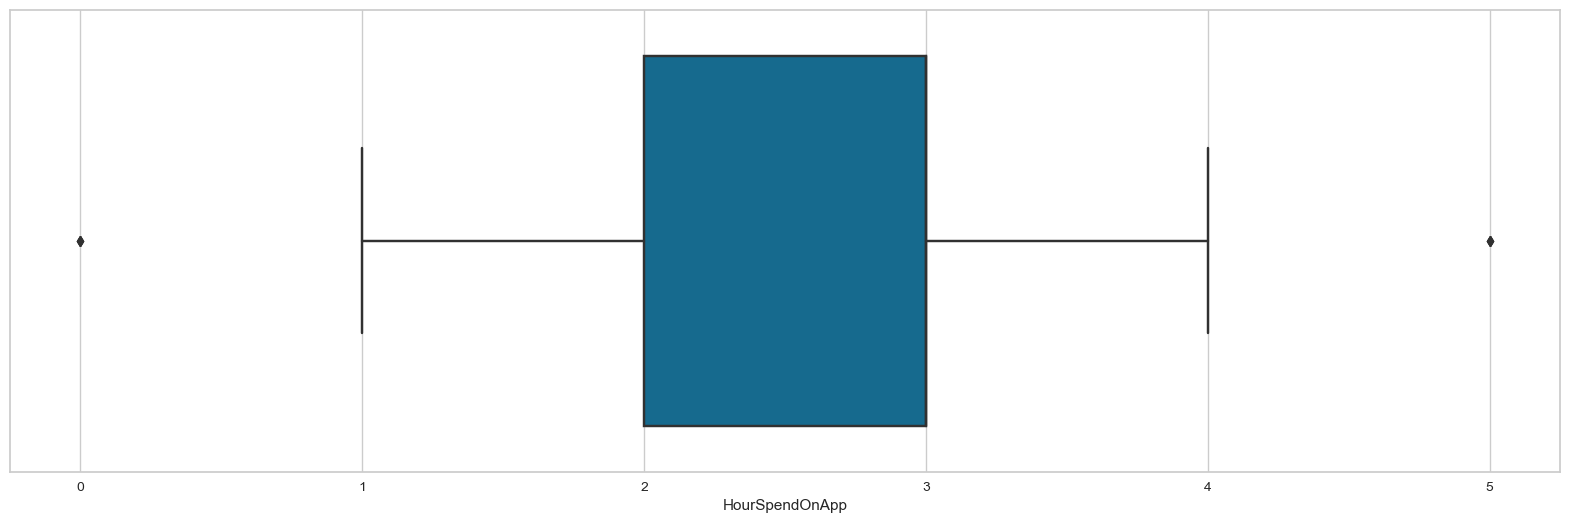

In [88]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['HourSpendOnApp'])

In [89]:
App_user1[App_user1.HourSpendOnApp == 0]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
150       0    10.0             Computer         1              6.0   
950       0     5.0         Mobile Phone         1             16.0   
1950      0    11.0             Computer         1             18.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
150           Credit Card  Female             0.0                         3   
950           Credit Card    Male             0.0                         3   
1950           Debit Card    Male             0.0                         4   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
150              Fashion                  2       Married                3   
950              Fashion                  1        Single                3   
1950  Laptop & Accessory                  5       Married                3   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
150          1                         18.0         0.0         NaN   
950          0                         25.0         0.0         1.0   
1950         0                         15.0         1.0         1.0   

      DaySinceLastOrder  CashbackAmount  
150                 2.0             236  
950                 NaN             212  
1950                2.0             163

In [90]:
App_user1.HourSpendOnApp.describe()

count    5111.000000
mean        2.955586
std         0.722699
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

In [91]:
App_user1.HourSpendOnApp.value_counts(normalize= True)*100

3.0    50.166308
2.0    26.081002
4.0    22.989630
1.0     0.645666
0.0     0.058697
5.0     0.058697
Name: HourSpendOnApp, dtype: float64

In [92]:
# Since 50% of the data is 3hrs in the hourspendapp columns; therefore, imputing the NAN values with 3 

App_user1.HourSpendOnApp.fillna(3,inplace= True)

In [93]:
App_user1.HourSpendOnApp.isnull().sum()

0

In [94]:
App_user1.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [95]:
App_user1.OrderAmountHikeFromlastYear.value_counts(normalize= True)

13.0    0.137620
14.0    0.137228
12.0    0.135464
15.0    0.103901
11.0    0.070378
16.0    0.062145
18.0    0.059792
19.0    0.059204
17.0    0.056263
20.0    0.045089
21.0    0.035091
22.0    0.034895
23.0    0.026465
24.0    0.016467
25.0    0.013527
26.0    0.006469
Name: OrderAmountHikeFromlastYear, dtype: float64

<AxesSubplot:xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

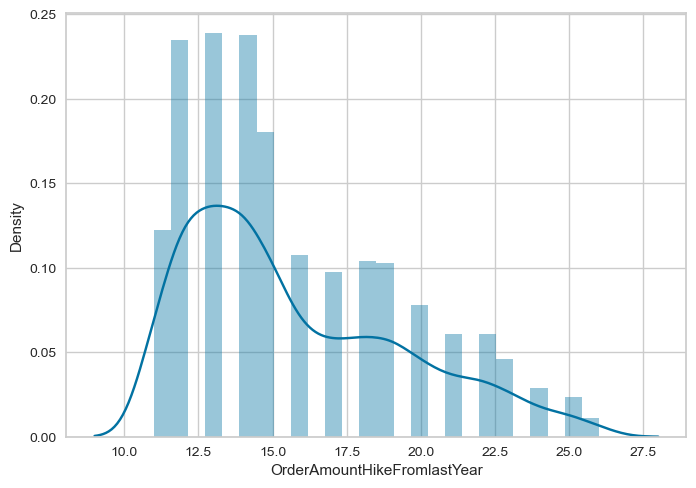

In [96]:
sns.distplot(App_user1.OrderAmountHikeFromlastYear)

In [97]:
# Imputing the values 0 where there is NAN

list1 = ["OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"]

for i in App_user1[list1]:
    
    App_user1[i].fillna(0,inplace= True) 

In [98]:
App_user1.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [99]:
App_user1.DaySinceLastOrder.describe()

count    5059.000000
mean        4.674639
std         3.662903
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

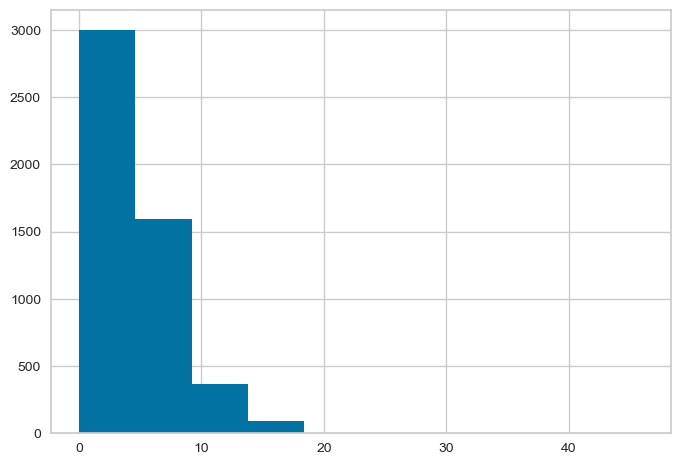

In [100]:
plt.hist(App_user1["DaySinceLastOrder"])
plt.show()

<AxesSubplot:xlabel='DaySinceLastOrder', ylabel='Density'>

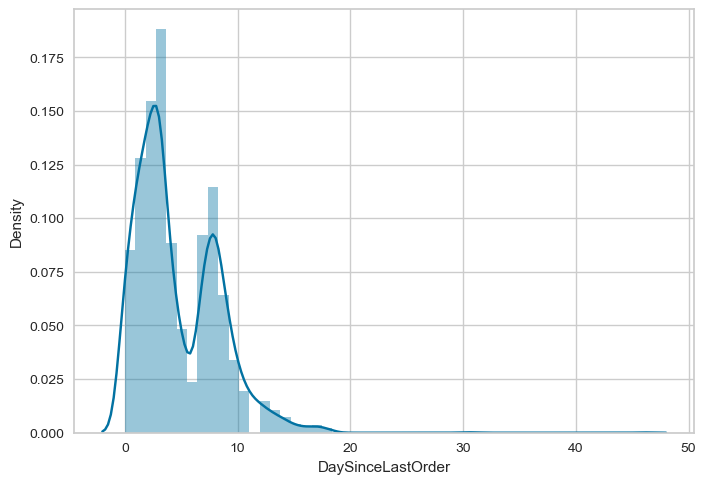

In [101]:
sns.distplot(App_user1["DaySinceLastOrder"])

In [102]:
App_user1.DaySinceLastOrder.value_counts(normalize= True)

3.0     0.172959
2.0     0.142321
1.0     0.118008
8.0     0.105357
7.0     0.084799
4.0     0.081439
0.0     0.078276
9.0     0.059103
5.0     0.044278
10.0    0.031034
6.0     0.021941
11.0    0.017988
12.0    0.013639
13.0    0.009686
14.0    0.006918
15.0    0.003756
17.0    0.003360
16.0    0.002570
18.0    0.001977
30.0    0.000198
46.0    0.000198
31.0    0.000198
Name: DaySinceLastOrder, dtype: float64

In [103]:
App_user1 = App_user1[~ App_user1.DaySinceLastOrder.isnull()]

In [104]:
App_user1.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

##### We have fixed all the null values till now. Will fix the outliers now.

In [105]:
App_user1.describe(percentiles=[0.7,0.80,0.85,0.90,0.95,0.98,0.99])

Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  5059.000000  5059.000000  5059.000000      5059.000000     5059.000000   
mean      0.160704    10.098438     1.651117        15.587073        2.945048   
std       0.367294     8.570746     0.914842         8.384828        0.705949   
min       0.000000     0.000000     1.000000         5.000000        0.000000   
50%       0.000000     9.000000     1.000000        14.000000        3.000000   
70%       0.000000    14.000000     3.000000        17.000000        3.000000   
80%       0.000000    18.000000     3.000000        23.000000        4.000000   
85%       1.000000    20.000000     3.000000        26.000000        4.000000   
90%       1.000000    23.000000     3.000000        30.000000        4.000000   
95%       1.000000    27.000000     3.000000        33.000000        4.000000   
98%       1.000000    30.000000     3.000000        35.000000        4.000000   
99%       1.000000    30.000000     3.000000        35.000000        4.000000   
max       1.000000    61.000000     3.000000       127.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               5059.000000        5059.000000      5059.000000   
mean                   3.684523           3.061277         4.241945   
std                    1.031387           1.384473         2.587567   
min                    1.000000           1.000000         1.000000   
50%                    4.000000           3.000000         3.000000   
70%                    4.000000           4.000000         5.000000   
80%                    4.000000           4.000000         6.000000   
85%                    5.000000           5.000000         7.000000   
90%                    5.000000           5.000000         8.000000   
95%                    5.000000           5.000000        10.000000   
98%                    6.000000           5.000000        10.000000   
99%                    6.000000           5.000000        11.000000   
max                    6.000000           5.000000        22.000000   

          Complain  OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count  5059.000000                  5059.000000  5059.000000  5059.000000   
mean      0.286618                    14.885946     1.662384     2.837122   
std       0.452226                     5.000142     1.845739     2.875971   
min       0.000000                     0.000000     0.000000     0.000000   
50%       0.000000                    14.000000     1.000000     2.000000   
70%       0.000000                    17.000000     2.000000     2.000000   
80%       1.000000                    19.000000     2.000000     4.000000   
85%       1.000000                    20.000000     3.000000     5.000000   
90%       1.000000                    21.000000     4.000000     7.000000   
95%       1.000000                    23.000000     6.000000     9.000000   
98%       1.000000                    24.000000     7.000000    12.000000   
99%       1.000000                    25.000000     8.420000    14.000000   
max       1.000000                    26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        5059.000000     5059.000000  
mean            4.674639      177.541807  
std             3.662903       49.063181  
min             0.000000        0.000000  
50%             3.000000      163.000000  
70%             7.000000      183.000000  
80%             8.000000      200.000000  
85%             9.000000      234.000000  
90%             9.000000      263.200000  
95%            11.000000      293.000000  
98%            13.000000      313.000000  
99%            15.000000      319.000000  
max            46.000000      325.000000

<AxesSubplot:xlabel='Tenure'>

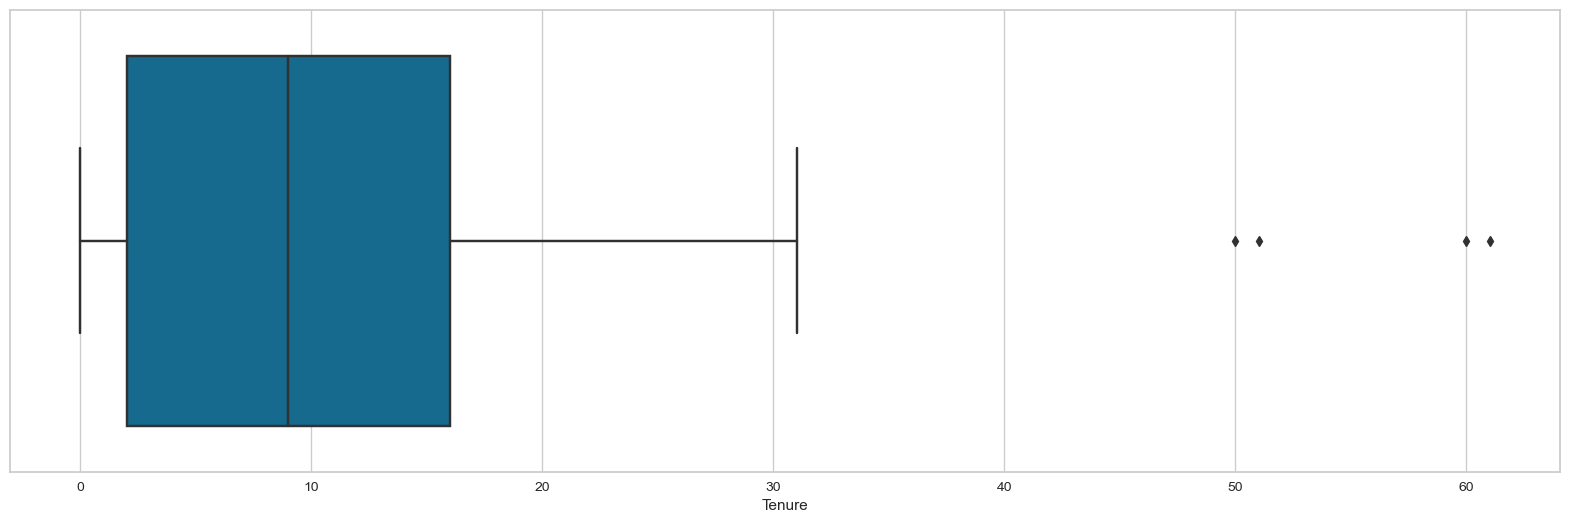

In [106]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['Tenure'])

In [107]:
bin_manual = [0,10,20,62]
labs = ["low_tenured", "medium-tenured", "high-tenured"]

App_user1["tenure_group"]= pd.cut(App_user1["Tenure"], bins= bin_manual, labels= labs)

In [108]:
App_user1[["tenure_group", "Tenure"]]

tenure_group  Tenure
0        low_tenured     4.0
3                NaN     0.0
4                NaN     0.0
5                NaN     0.0
8     medium-tenured    13.0
...              ...     ...
5624     low_tenured     1.0
5625     low_tenured    10.0
5627     low_tenured     1.0
5628    high-tenured    23.0
5629     low_tenured     8.0

[5059 rows x 2 columns]

In [109]:
App_user1 = App_user1[~ App_user1.tenure_group.isnull()]

In [110]:
App_user1.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1     4.0         Mobile Phone         3              6.0   
8       1    13.0                Phone         3              9.0   
10      1     4.0         Mobile Phone         1             18.0   
11      1    11.0         Mobile Phone         1              6.0   
14      1     9.0         Mobile Phone         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female             3.0                         3   
8              E wallet    Male             3.0                         4   
10     Cash on Delivery  Female             2.0                         3   
11           Debit Card    Male             3.0                         4   
14          Credit Card    Male             3.0                         4   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                  2        Single                9   
8               Mobile                  3      Divorced                2   
10              Others                  3      Divorced                2   
11             Fashion                  3        Single               10   
14             Fashion                  2        Single                2   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                         11.0         1.0         1.0   
8          1                         14.0         0.0         1.0   
10         0                          0.0         9.0        15.0   
11         1                         13.0         0.0         1.0   
14         0                         16.0         0.0         4.0   

    DaySinceLastOrder  CashbackAmount    tenure_group  
0                 5.0             160     low_tenured  
8                 2.0             127  medium-tenured  
10                8.0             295     low_tenured  
11                0.0             154  medium-tenured  
14                7.0             196     low_tenured

In [111]:
App_user1.drop("Tenure", axis= 1, inplace= True)

In [112]:
App_user1.head()

Churn PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1         Mobile Phone         3              6.0   
8       1                Phone         3              9.0   
10      1         Mobile Phone         1             18.0   
11      1         Mobile Phone         1              6.0   
14      1         Mobile Phone         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female             3.0                         3   
8              E wallet    Male             3.0                         4   
10     Cash on Delivery  Female             2.0                         3   
11           Debit Card    Male             3.0                         4   
14          Credit Card    Male             3.0                         4   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                  2        Single                9   
8               Mobile                  3      Divorced                2   
10              Others                  3      Divorced                2   
11             Fashion                  3        Single               10   
14             Fashion                  2        Single                2   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                         11.0         1.0         1.0   
8          1                         14.0         0.0         1.0   
10         0                          0.0         9.0        15.0   
11         1                         13.0         0.0         1.0   
14         0                         16.0         0.0         4.0   

    DaySinceLastOrder  CashbackAmount    tenure_group  
0                 5.0             160     low_tenured  
8                 2.0             127  medium-tenured  
10                8.0             295     low_tenured  
11                0.0             154  medium-tenured  
14                7.0             196     low_tenured

In [113]:
App_user1.shape

(4554, 19)

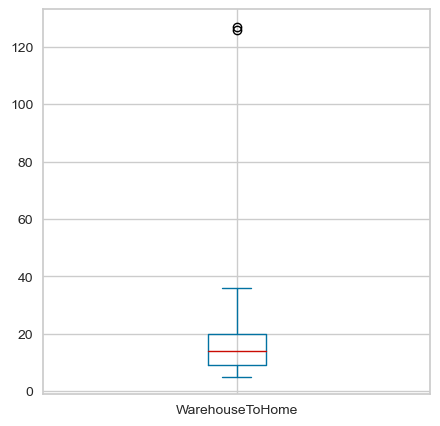

In [114]:
plt.figure(figsize=(5,5))
App_user1.WarehouseToHome.plot.box()
plt.show()

In [115]:
# It's clearly visible that there are 2 values which are very high.

q_h = App_user1["WarehouseToHome"].quantile(0.99)

In [116]:
App_user1["WarehouseToHome"] = App_user1["WarehouseToHome"].clip(upper= q_h)

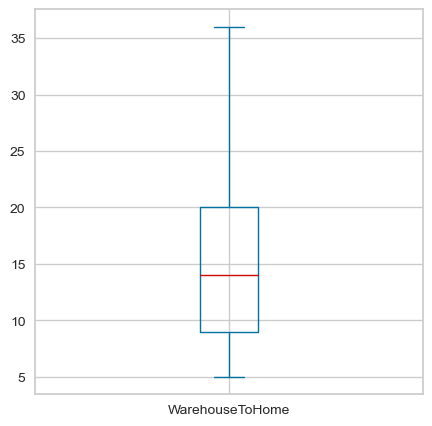

In [117]:
plt.figure(figsize=(5,5))
App_user1.WarehouseToHome.plot.box()
plt.show()

<AxesSubplot:xlabel='NumberOfAddress'>

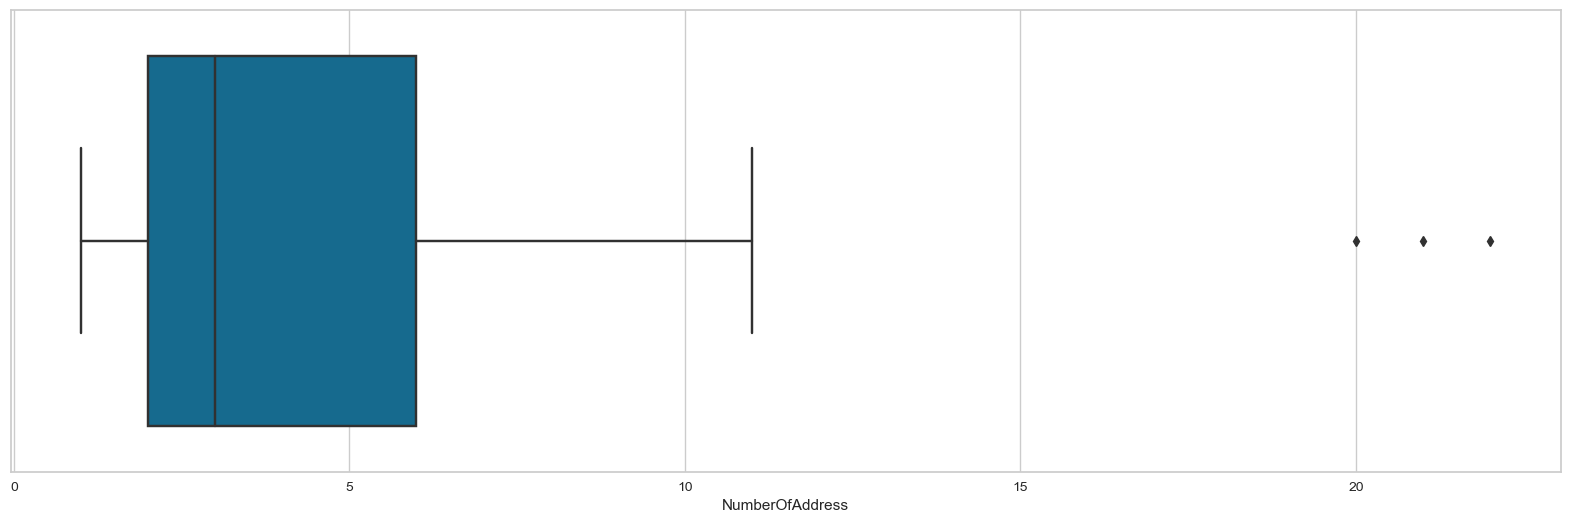

In [118]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['NumberOfAddress'])

In [119]:
q_h = App_user1["NumberOfAddress"].quantile(0.99)

App_user1["NumberOfAddress"] = App_user1["NumberOfAddress"].clip(upper= q_h)

<AxesSubplot:xlabel='NumberOfAddress'>

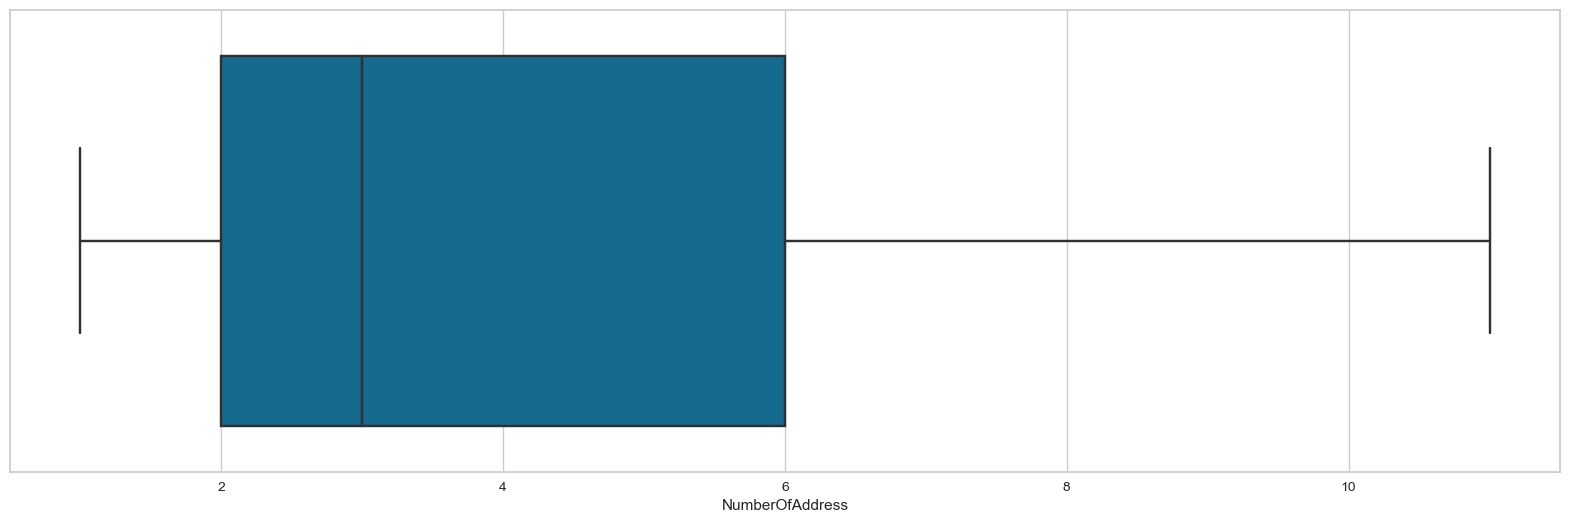

In [120]:
plt.figure(figsize=(20,6))
sns.boxplot(App_user1['NumberOfAddress'])

<AxesSubplot:xlabel='CouponUsed'>

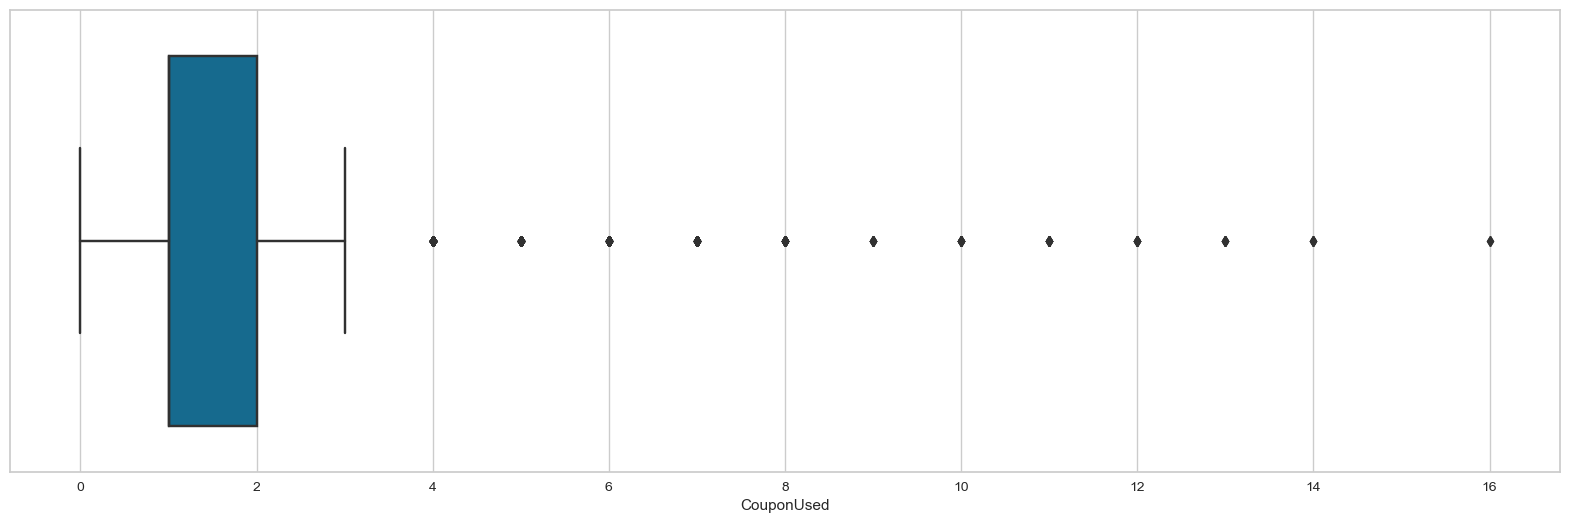

In [121]:
# In CouponUsed - there are many outlier but there is a pattern which is quite visible that values are continuous they are not breaking the main body, hence not treating the outliers.

plt.figure(figsize=(20,6))
sns.boxplot(App_user1['CouponUsed'])

<AxesSubplot:xlabel='DaySinceLastOrder'>

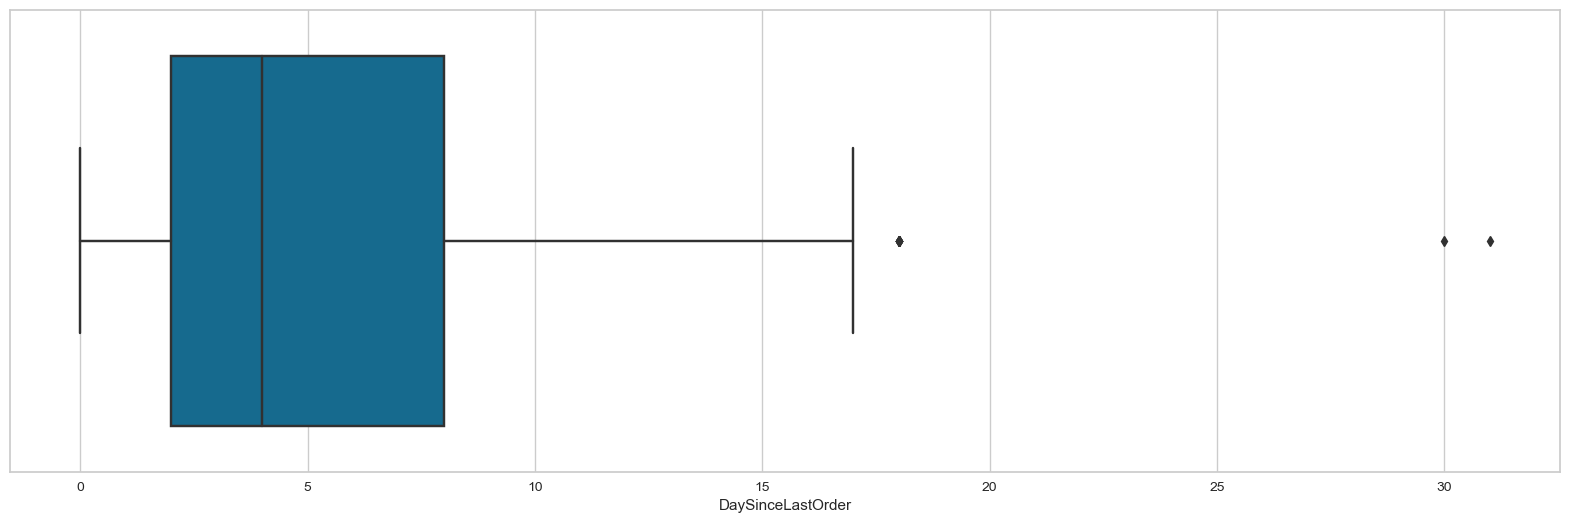

In [122]:
# DaySinceLastOrder

plt.figure(figsize=(20,6))
sns.boxplot(App_user1['DaySinceLastOrder'])

In [123]:
q_h = App_user1["DaySinceLastOrder"].quantile(0.99)

App_user1["DaySinceLastOrder"] = App_user1["DaySinceLastOrder"].clip(upper= q_h)

Now we are done with fixing the missing values and outlier handlings, so let's move forward towards EDA. 

#### EDA -

In [124]:
App_user1.head(10)

Churn PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1         Mobile Phone         3              6.0   
8       1                Phone         3              9.0   
10      1         Mobile Phone         1             18.0   
11      1         Mobile Phone         1              6.0   
14      1         Mobile Phone         3             15.0   
19      1         Mobile Phone         1             20.0   
21      1         Mobile Phone         1             29.0   
24      1             Computer         1             14.0   
26      0         Mobile Phone         3              6.0   
28      0                Phone         1             14.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female             3.0                         3   
8              E wallet    Male             3.0                         4   
10     Cash on Delivery  Female             2.0                         3   
11           Debit Card    Male             3.0                         4   
14          Credit Card    Male             3.0                         4   
19           Debit Card  Female             3.0                         3   
21          Credit Card  Female             3.0                         3   
24           Debit Card    Male             2.0                         5   
26             E wallet    Male             3.0                         3   
28           Debit Card    Male             2.0                         3   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                  2        Single              9.0   
8               Mobile                  3      Divorced              2.0   
10              Others                  3      Divorced              2.0   
11             Fashion                  3        Single             10.0   
14             Fashion                  2        Single              2.0   
19        Mobile Phone                  4      Divorced             10.0   
21             Fashion                  2      Divorced              2.0   
24             Fashion                  2        Single              3.0   
26             Fashion                  4      Divorced              2.0   
28  Laptop & Accessory                  4       Married              9.0   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                         11.0         1.0         1.0   
8          1                         14.0         0.0         1.0   
10         0                          0.0         9.0        15.0   
11         1                         13.0         0.0         1.0   
14         0                         16.0         0.0         4.0   
19         1                         18.0         1.0         4.0   
21         0                         12.0        11.0        15.0   
24         0                         15.0         0.0         1.0   
26         0                         13.0         1.0         1.0   
28         0                         18.0         1.0         1.0   

    DaySinceLastOrder  CashbackAmount    tenure_group  
0                 5.0             160     low_tenured  
8                 2.0             127  medium-tenured  
10                8.0             295     low_tenured  
11                0.0             154  medium-tenured  
14                7.0             196     low_tenured  
19                3.0             150  medium-tenured  
21                6.0             203  medium-tenured  
24                3.0             207  medium-tenured  
26                6.0             173     low_tenured  
28               15.0             123  medium-tenured

In [125]:
App_user1["WarehouseToHome"] = App_user1["WarehouseToHome"].astype("int64")

In [126]:
list1 = ["HourSpendOnApp", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder"]

for i in App_user1[list1]:
    
    App_user1[i] = App_user1[i].astype("int64")
    
# Converted all the float variables into integer format

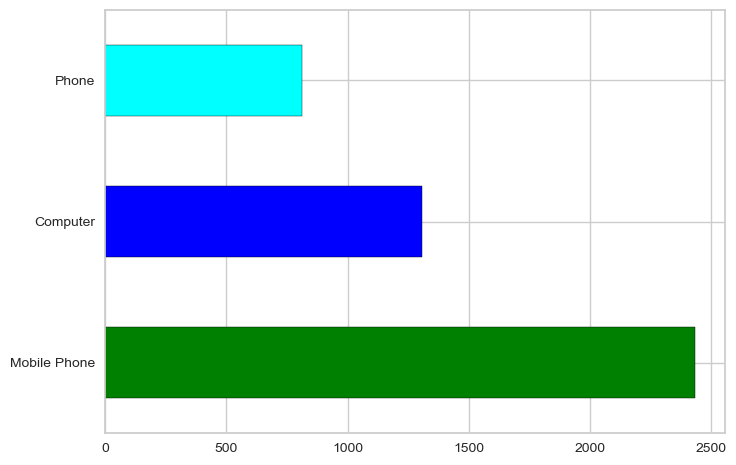

In [127]:
App_user1.PreferredLoginDevice.value_counts().plot.barh(color=['green', 'blue', 'cyan'], edgecolor='black')
plt.show()

Mobile phone users are high in numbers to order almost double.

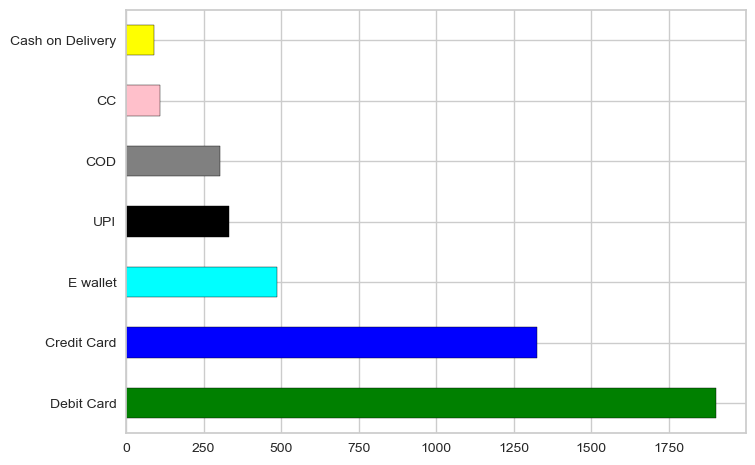

In [128]:
App_user1.PreferredPaymentMode.value_counts().plot.barh(color=['green', 'blue', 'cyan', "black", "grey", "pink", "yellow"], edgecolor='black')
plt.show()

Credit and debit card contributes the highest and minimum is COD.

<AxesSubplot:ylabel='tenure_group'>

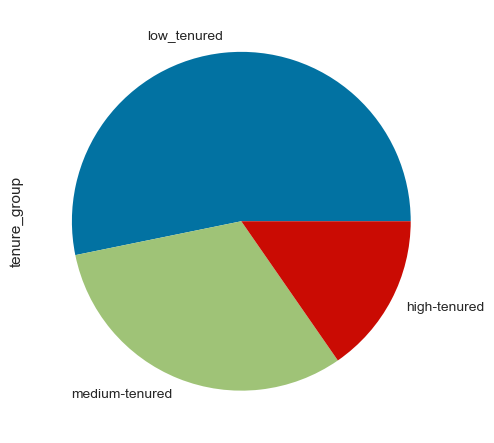

In [129]:
App_user1.tenure_group.value_counts().plot.pie()

Low - tenured customer contributes almost 53% of the entire populations and these are the people who are less than 10 months old in the platform.

In [130]:
App_user1.tenure_group.value_counts(normalize= True)

low_tenured       0.532060
medium-tenured    0.314449
high-tenured      0.153491
Name: tenure_group, dtype: float64

<AxesSubplot:ylabel='Churn'>

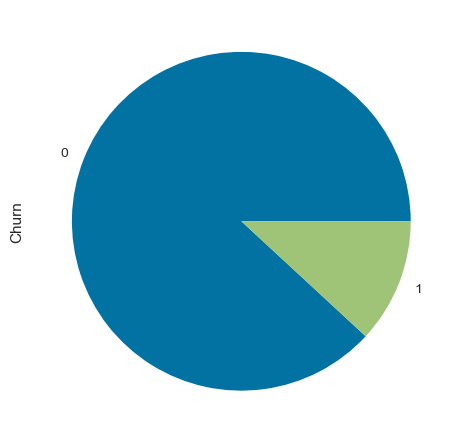

In [131]:
App_user1.Churn.value_counts(normalize= True).plot.pie()

In [132]:
App_user1.Churn.value_counts(normalize= True)

0    0.881203
1    0.118797
Name: Churn, dtype: float64

<AxesSubplot:>

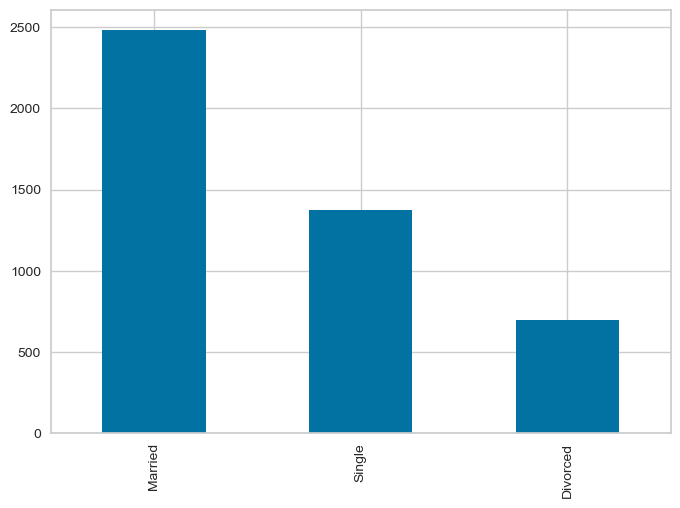

In [133]:
App_user1.MaritalStatus.value_counts().plot.bar()

<AxesSubplot:>

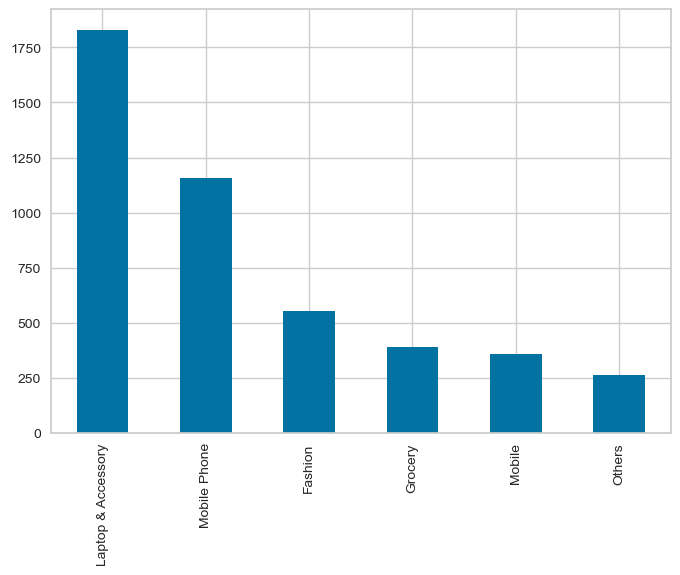

In [134]:
# PreferedOrderCat

App_user1.PreferedOrderCat.value_counts().plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='WarehouseToHome'>

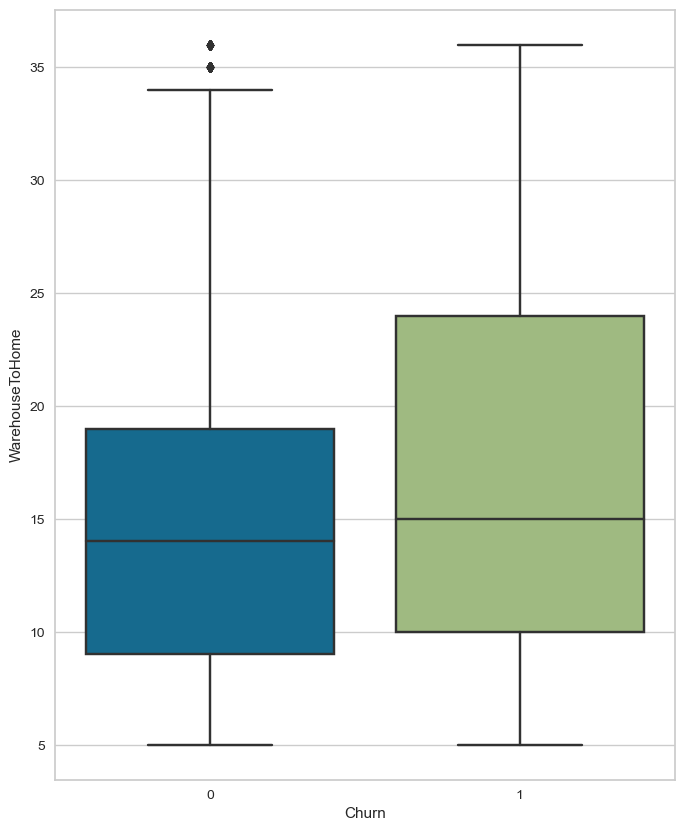

In [135]:
plt.figure(figsize=(8,10))
sns.boxplot(x = "Churn", y = "WarehouseToHome", data= App_user1)

# Distance more than 20kms has a high chance to churn.

In [136]:
App_user1.head()

Churn PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1         Mobile Phone         3                6   
8       1                Phone         3                9   
10      1         Mobile Phone         1               18   
11      1         Mobile Phone         1                6   
14      1         Mobile Phone         3               15   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female               3                         3   
8              E wallet    Male               3                         4   
10     Cash on Delivery  Female               2                         3   
11           Debit Card    Male               3                         4   
14          Credit Card    Male               3                         4   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                  2        Single              9.0   
8               Mobile                  3      Divorced              2.0   
10              Others                  3      Divorced              2.0   
11             Fashion                  3        Single             10.0   
14             Fashion                  2        Single              2.0   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                           11           1           1   
8          1                           14           0           1   
10         0                            0           9          15   
11         1                           13           0           1   
14         0                           16           0           4   

    DaySinceLastOrder  CashbackAmount    tenure_group  
0                   5             160     low_tenured  
8                   2             127  medium-tenured  
10                  8             295     low_tenured  
11                  0             154  medium-tenured  
14                  7             196     low_tenured

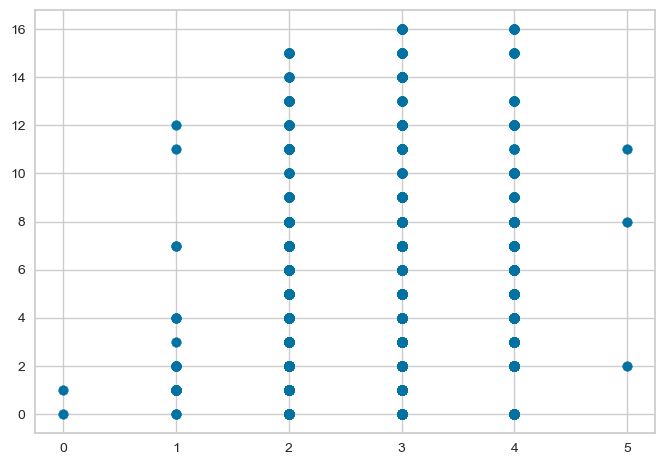

In [137]:
plt.scatter(x = "HourSpendOnApp", y = "OrderCount", data= App_user1)

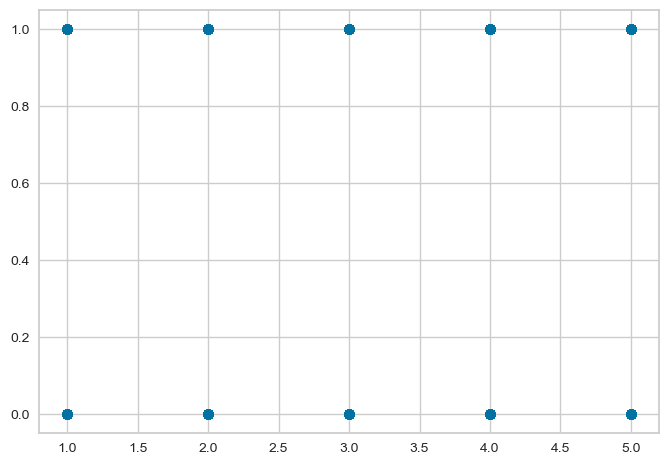

In [138]:
plt.scatter(x = "SatisfactionScore", y = "Complain", data= App_user1)

<AxesSubplot:xlabel='OrderCount'>

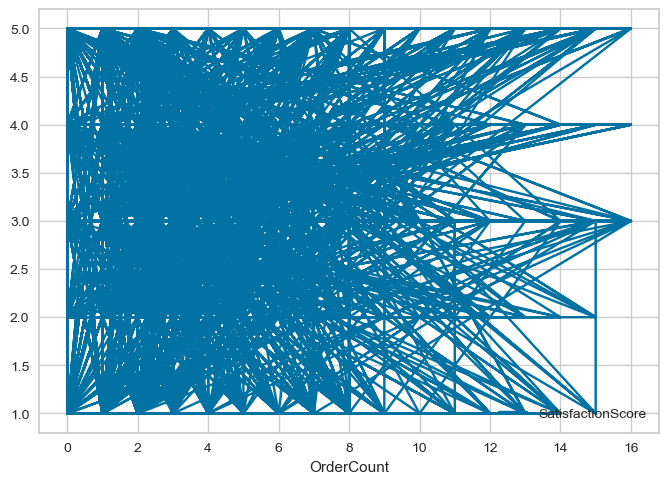

In [139]:
App_user1.plot.line(y= "SatisfactionScore", x = "OrderCount")

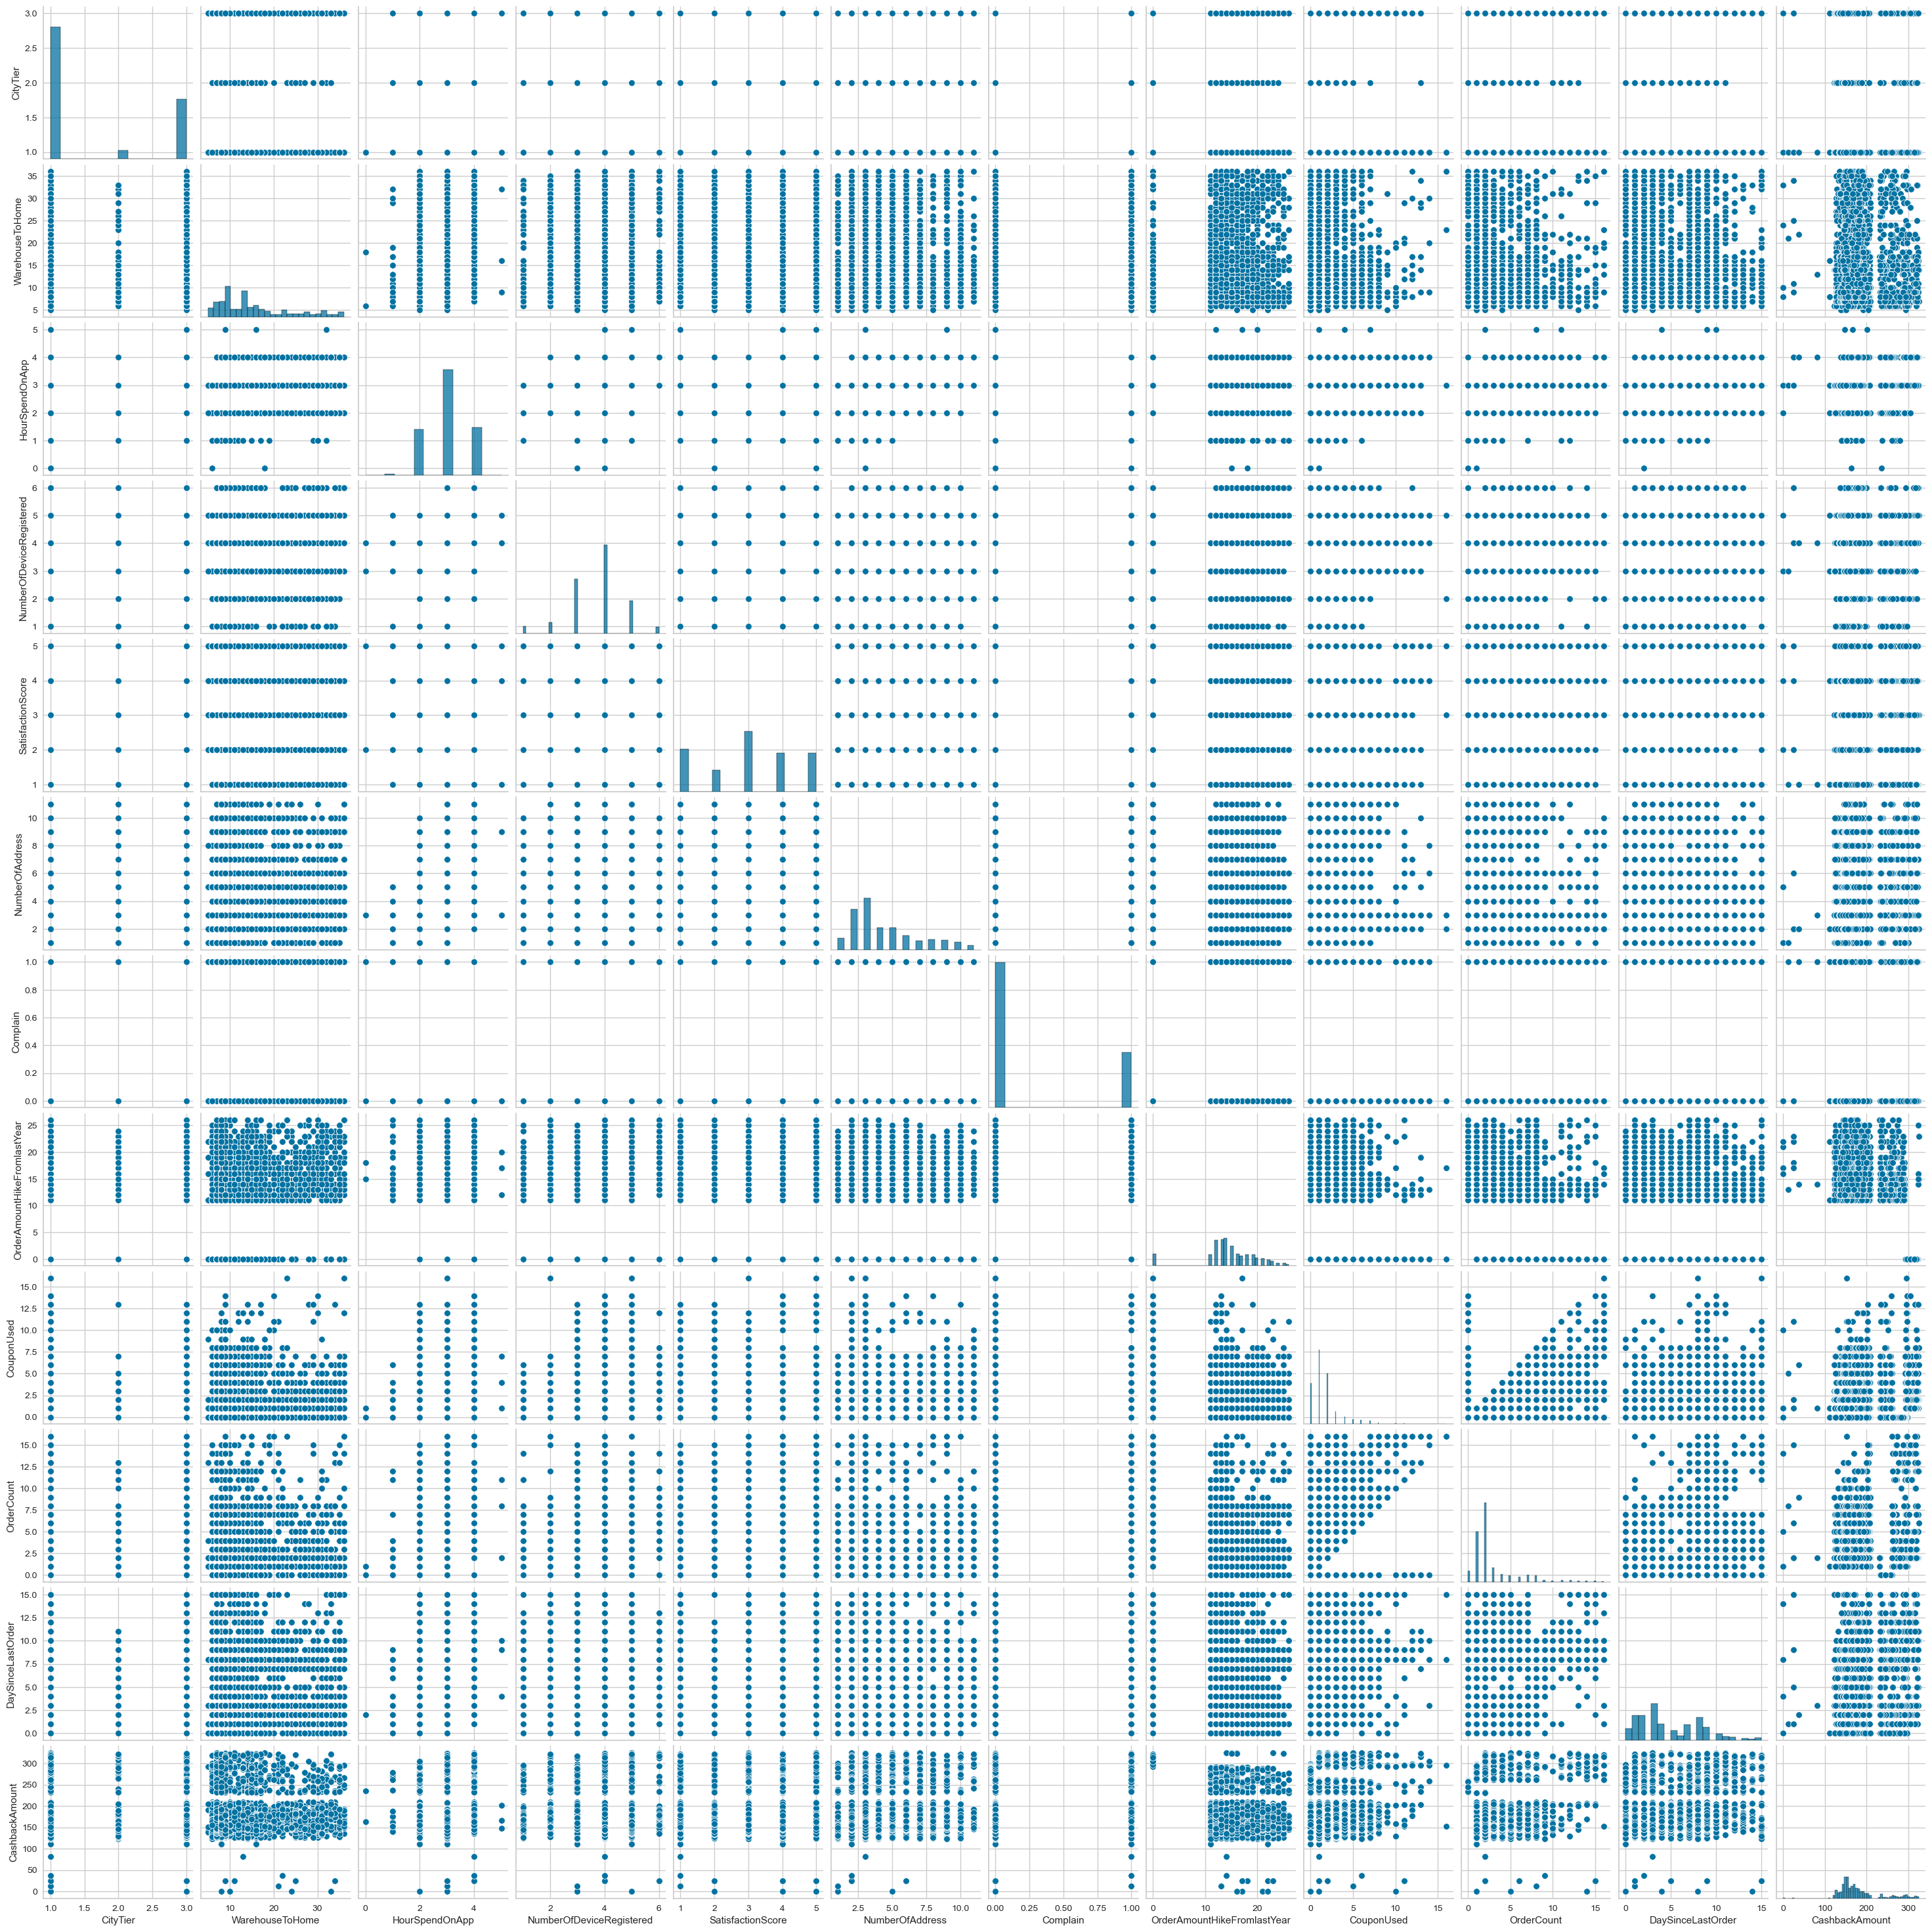

In [140]:
sns.pairplot(data=App_user1, vars=["CityTier", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"])

In [141]:
res = App_user1[["CityTier", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress","Complain","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]].corr()

<AxesSubplot:>

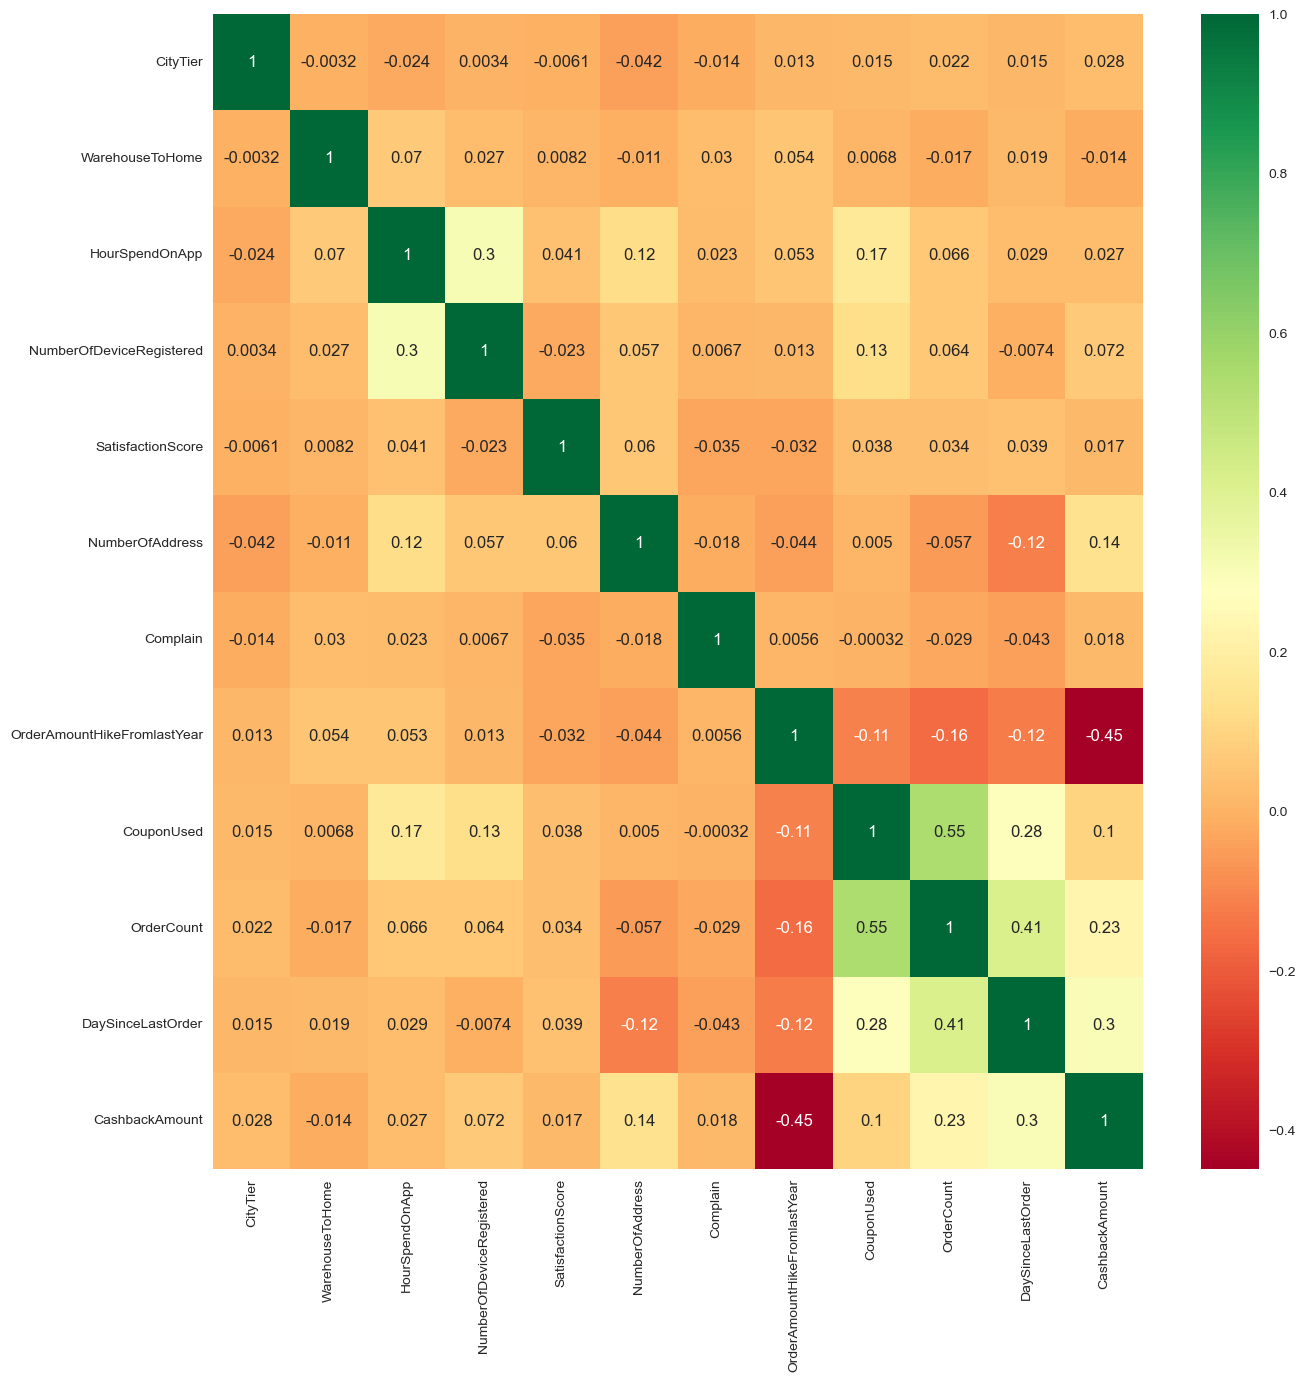

In [142]:
plt.figure(figsize=(15,15))
sns.heatmap(res,annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='MaritalStatus'>

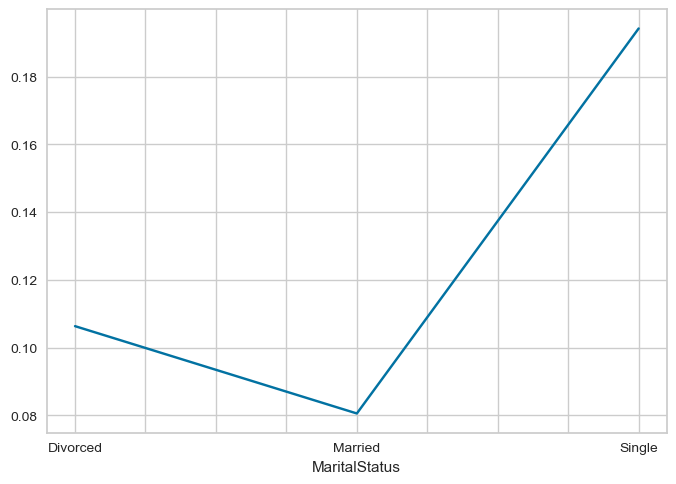

In [143]:
App_user1.groupby("MaritalStatus")["Churn"].mean().plot.line()

Single customer has a higher rate of churn and least is married

In [144]:
App_user1.head()

Churn PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1         Mobile Phone         3                6   
8       1                Phone         3                9   
10      1         Mobile Phone         1               18   
11      1         Mobile Phone         1                6   
14      1         Mobile Phone         3               15   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female               3                         3   
8              E wallet    Male               3                         4   
10     Cash on Delivery  Female               2                         3   
11           Debit Card    Male               3                         4   
14          Credit Card    Male               3                         4   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                  2        Single              9.0   
8               Mobile                  3      Divorced              2.0   
10              Others                  3      Divorced              2.0   
11             Fashion                  3        Single             10.0   
14             Fashion                  2        Single              2.0   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                           11           1           1   
8          1                           14           0           1   
10         0                            0           9          15   
11         1                           13           0           1   
14         0                           16           0           4   

    DaySinceLastOrder  CashbackAmount    tenure_group  
0                   5             160     low_tenured  
8                   2             127  medium-tenured  
10                  8             295     low_tenured  
11                  0             154  medium-tenured  
14                  7             196     low_tenured

<AxesSubplot:xlabel='PreferredLoginDevice'>

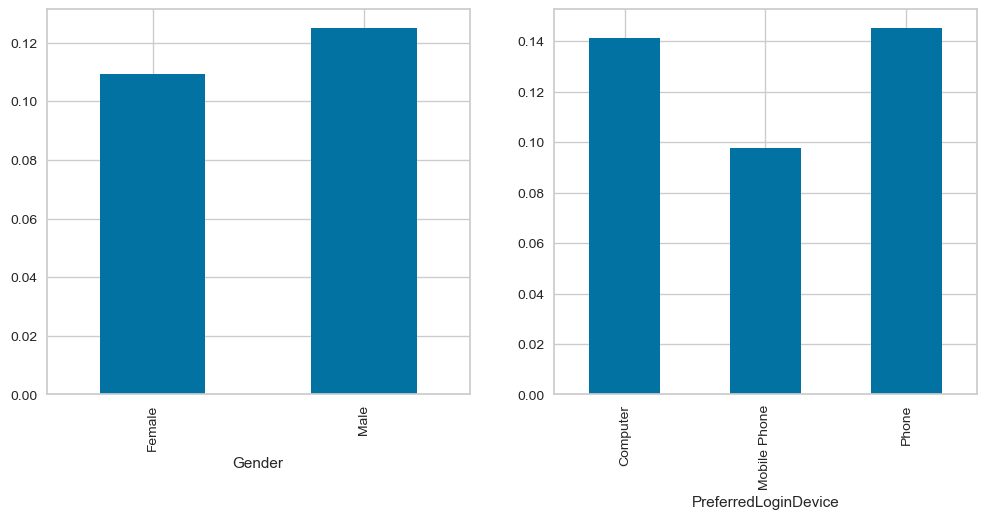

In [145]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
App_user1.groupby("Gender")["Churn"].mean().plot.bar()
plt.subplot(1,2,2)
App_user1.groupby("PreferredLoginDevice")["Churn"].mean().plot.bar()

Male customer who are placing order on the platform through phone call are churning more.

<AxesSubplot:xlabel='tenure_group'>

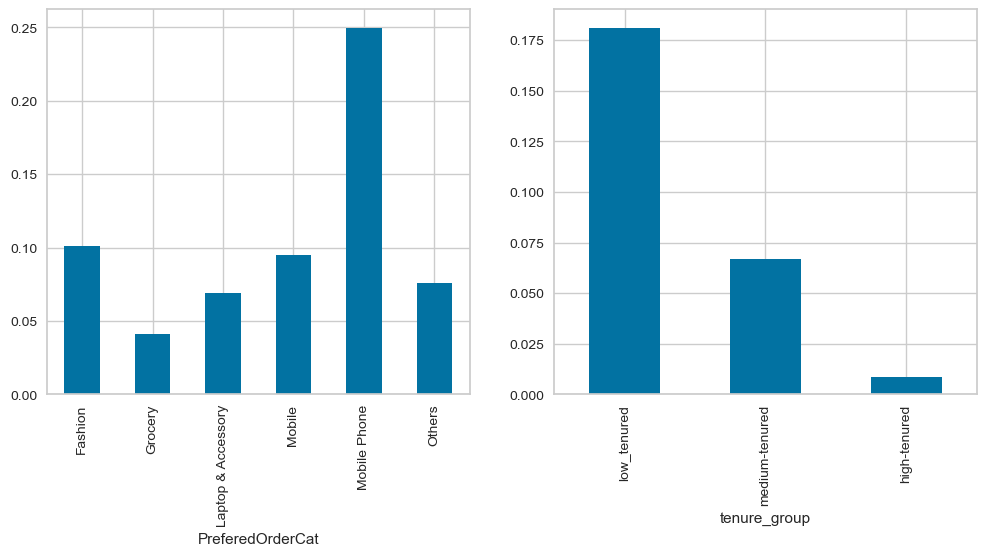

In [146]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
App_user1.groupby("PreferedOrderCat")["Churn"].mean().plot.bar()
plt.subplot(1,2,2)
App_user1.groupby("tenure_group")["Churn"].mean().plot.bar()

Mobile phone category and low - tenured (0-10) old customer are churing more.

In [147]:
App_user1.head()

Churn PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1         Mobile Phone         3                6   
8       1                Phone         3                9   
10      1         Mobile Phone         1               18   
11      1         Mobile Phone         1                6   
14      1         Mobile Phone         3               15   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female               3                         3   
8              E wallet    Male               3                         4   
10     Cash on Delivery  Female               2                         3   
11           Debit Card    Male               3                         4   
14          Credit Card    Male               3                         4   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                  2        Single              9.0   
8               Mobile                  3      Divorced              2.0   
10              Others                  3      Divorced              2.0   
11             Fashion                  3        Single             10.0   
14             Fashion                  2        Single              2.0   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                           11           1           1   
8          1                           14           0           1   
10         0                            0           9          15   
11         1                           13           0           1   
14         0                           16           0           4   

    DaySinceLastOrder  CashbackAmount    tenure_group  
0                   5             160     low_tenured  
8                   2             127  medium-tenured  
10                  8             295     low_tenured  
11                  0             154  medium-tenured  
14                  7             196     low_tenured

<AxesSubplot:xlabel='PreferredLoginDevice', ylabel='MaritalStatus'>

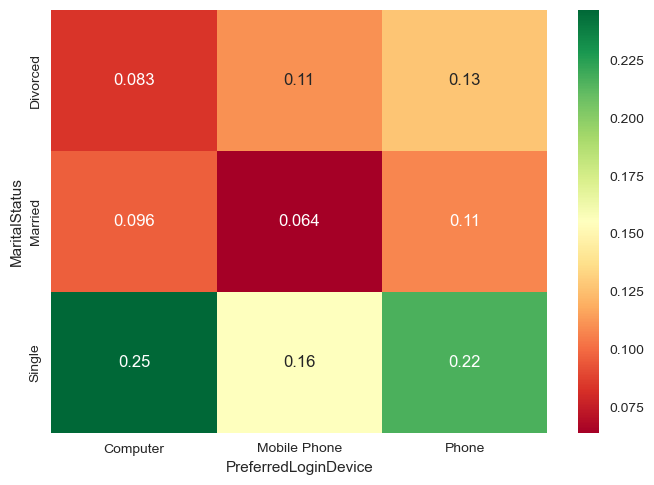

In [148]:
# Will start with multi - variate analysis.

res1 = App_user1.pivot_table(index= "MaritalStatus", columns= "PreferredLoginDevice", values = "Churn")

sns.heatmap(res1,annot=True,cmap="RdYlGn")

Single customer who are login with the computer and phone are risky to churn.

<AxesSubplot:xlabel='tenure_group', ylabel='CityTier'>

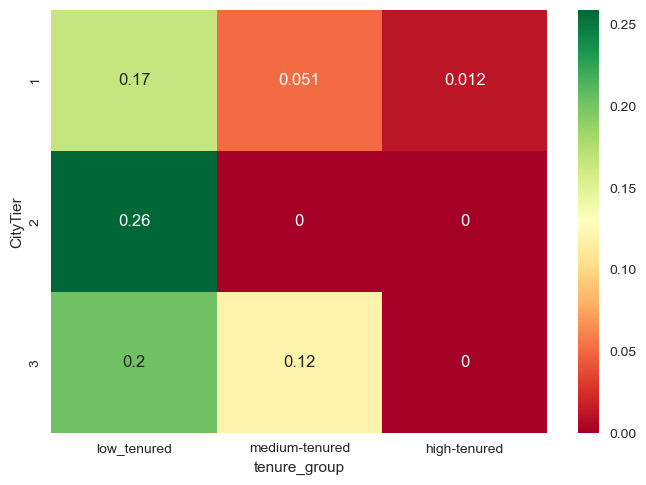

In [149]:
res2 = App_user1.pivot_table(index= "CityTier", columns= "tenure_group", values = "Churn")

sns.heatmap(res2,annot=True,cmap="RdYlGn")

Tier 2 and tier 3 cities with low - tenured group are more likely to churn.

<AxesSubplot:xlabel='PreferredPaymentMode', ylabel='PreferedOrderCat'>

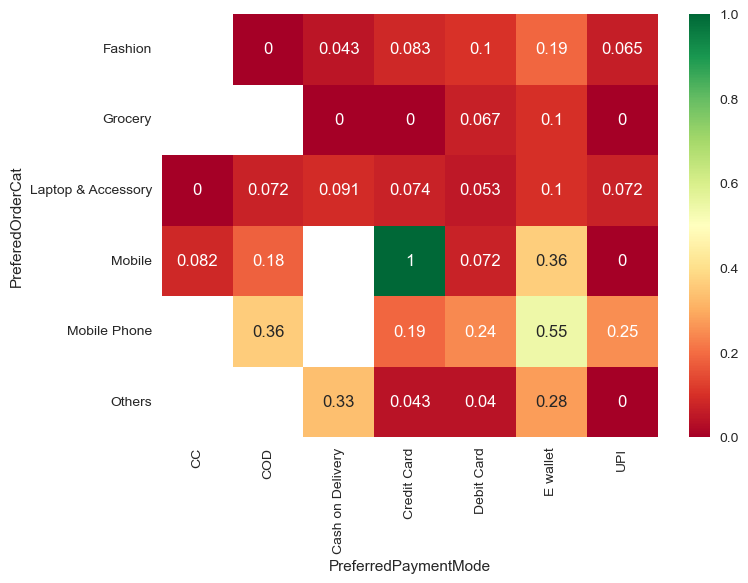

In [150]:
res3 = App_user1.pivot_table(index= "PreferedOrderCat", columns= "PreferredPaymentMode", values = "Churn")

sns.heatmap(res3,annot=True,cmap="RdYlGn", center= 0.5)

Mobile phone and COD & credit card are risky.

#### Model building -  

In [151]:
App_user1.head()

Churn PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1         Mobile Phone         3                6   
8       1                Phone         3                9   
10      1         Mobile Phone         1               18   
11      1         Mobile Phone         1                6   
14      1         Mobile Phone         3               15   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female               3                         3   
8              E wallet    Male               3                         4   
10     Cash on Delivery  Female               2                         3   
11           Debit Card    Male               3                         4   
14          Credit Card    Male               3                         4   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                  2        Single              9.0   
8               Mobile                  3      Divorced              2.0   
10              Others                  3      Divorced              2.0   
11             Fashion                  3        Single             10.0   
14             Fashion                  2        Single              2.0   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                           11           1           1   
8          1                           14           0           1   
10         0                            0           9          15   
11         1                           13           0           1   
14         0                           16           0           4   

    DaySinceLastOrder  CashbackAmount    tenure_group  
0                   5             160     low_tenured  
8                   2             127  medium-tenured  
10                  8             295     low_tenured  
11                  0             154  medium-tenured  
14                  7             196     low_tenured

In [152]:
# Create dummy variables for categorical variables 

dummy1 = pd.get_dummies(App_user1[["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus", "tenure_group"]])

App_user2 = pd.concat([App_user1,dummy1], axis=1)

In [153]:
App_user2.head()

Churn PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1         Mobile Phone         3                6   
8       1                Phone         3                9   
10      1         Mobile Phone         1               18   
11      1         Mobile Phone         1                6   
14      1         Mobile Phone         3               15   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female               3                         3   
8              E wallet    Male               3                         4   
10     Cash on Delivery  Female               2                         3   
11           Debit Card    Male               3                         4   
14          Credit Card    Male               3                         4   

      PreferedOrderCat  SatisfactionScore  ...  \
0   Laptop & Accessory                  2  ...   
8               Mobile                  3  ...   
10              Others                  3  ...   
11             Fashion                  3  ...   
14             Fashion                  2  ...   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                    1                        0   
8                                    0                        1   
10                                   0                        0   
11                                   0                        0   
14                                   0                        0   

    PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                               0                        0   
8                               0                        0   
10                              0                        1   
11                              0                        0   
14                              0                        0   

    MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                        0                      0                     1   
8                        1                      0                     0   
10                       1                      0                     0   
11                       0                      0                     1   
14                       0                      0                     1   

    tenure_group_low_tenured tenure_group_medium-tenured  \
0                          1                           0   
8                          0                           1   
10                         1                           0   
11                         0                           1   
14                         1                           0   

    tenure_group_high-tenured  
0                           0  
8                           0  
10                          0  
11                          0  
14                          0  

[5 rows x 41 columns]

In [154]:
dummy3 = pd.get_dummies(App_user1[["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus", "tenure_group"]],drop_first=True)

App_user4 = pd.concat([App_user1,dummy3], axis=1)

In [155]:
App_user4.head()

Churn PreferredLoginDevice  CityTier  WarehouseToHome  \
0       1         Mobile Phone         3                6   
8       1                Phone         3                9   
10      1         Mobile Phone         1               18   
11      1         Mobile Phone         1                6   
14      1         Mobile Phone         3               15   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female               3                         3   
8              E wallet    Male               3                         4   
10     Cash on Delivery  Female               2                         3   
11           Debit Card    Male               3                         4   
14          Credit Card    Male               3                         4   

      PreferedOrderCat  SatisfactionScore  ... PreferredPaymentMode_UPI  \
0   Laptop & Accessory                  2  ...                        0   
8               Mobile                  3  ...                        0   
10              Others                  3  ...                        0   
11             Fashion                  3  ...                        0   
14             Fashion                  2  ...                        0   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0                                    1   
8                          0                                    0   
10                         0                                    0   
11                         0                                    0   
14                         0                                    0   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                         0                              0   
8                         1                              0   
10                        0                              0   
11                        0                              0   
14                        0                              0   

    PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
0                         0                      0                     1   
8                         0                      0                     0   
10                        1                      0                     0   
11                        0                      0                     1   
14                        0                      0                     1   

   tenure_group_medium-tenured  tenure_group_high-tenured  
0                            0                          0  
8                            1                          0  
10                           0                          0  
11                           1                          0  
14                           0                          0  

[5 rows x 36 columns]

In [156]:
del App_user2

In [157]:
App_user4 = App_user4.drop(["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus", "tenure_group"], 1)

In [158]:
App_user4.head()

Churn  CityTier  WarehouseToHome  Gender  HourSpendOnApp  \
0       1         3                6  Female               3   
8       1         3                9    Male               3   
10      1         1               18  Female               2   
11      1         1                6    Male               3   
14      1         3               15    Male               3   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3                  2              9.0         1   
8                          4                  3              2.0         1   
10                         3                  3              2.0         0   
11                         4                  3             10.0         1   
14                         4                  2              2.0         0   

    OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_UPI  \
0                            11  ...                         0   
8                            14  ...                         0   
10                            0  ...                         0   
11                           13  ...                         0   
14                           16  ...                         0   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0                                    1   
8                          0                                    0   
10                         0                                    0   
11                         0                                    0   
14                         0                                    0   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                         0                              0   
8                         1                              0   
10                        0                              0   
11                        0                              0   
14                        0                              0   

    PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
0                         0                      0                     1   
8                         0                      0                     0   
10                        1                      0                     0   
11                        0                      0                     1   
14                        0                      0                     1   

    tenure_group_medium-tenured  tenure_group_high-tenured  
0                             0                          0  
8                             1                          0  
10                            0                          0  
11                            1                          0  
14                            0                          0  

[5 rows x 31 columns]

In [159]:
App_user4["Gender"] = App_user4["Gender"].apply(lambda x : 1 if x == "Male" else 0)

In [160]:
App_user4.head()

Churn  CityTier  WarehouseToHome  Gender  HourSpendOnApp  \
0       1         3                6       0               3   
8       1         3                9       1               3   
10      1         1               18       0               2   
11      1         1                6       1               3   
14      1         3               15       1               3   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3                  2              9.0         1   
8                          4                  3              2.0         1   
10                         3                  3              2.0         0   
11                         4                  3             10.0         1   
14                         4                  2              2.0         0   

    OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_UPI  \
0                            11  ...                         0   
8                            14  ...                         0   
10                            0  ...                         0   
11                           13  ...                         0   
14                           16  ...                         0   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0                                    1   
8                          0                                    0   
10                         0                                    0   
11                         0                                    0   
14                         0                                    0   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                         0                              0   
8                         1                              0   
10                        0                              0   
11                        0                              0   
14                        0                              0   

    PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
0                         0                      0                     1   
8                         0                      0                     0   
10                        1                      0                     0   
11                        0                      0                     1   
14                        0                      0                     1   

    tenure_group_medium-tenured  tenure_group_high-tenured  
0                             0                          0  
8                             1                          0  
10                            0                          0  
11                            1                          0  
14                            0                          0  

[5 rows x 31 columns]

In [161]:
App_user4.head()

pd.set_option('display.max_columns', None)

In [162]:
App_user4.head()

Churn  CityTier  WarehouseToHome  Gender  HourSpendOnApp  \
0       1         3                6       0               3   
8       1         3                9       1               3   
10      1         1               18       0               2   
11      1         1                6       1               3   
14      1         3               15       1               3   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3                  2              9.0         1   
8                          4                  3              2.0         1   
10                         3                  3              2.0         0   
11                         4                  3             10.0         1   
14                         4                  2              2.0         0   

    OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                            11           1           1                  5   
8                            14           0           1                  2   
10                            0           9          15                  8   
11                           13           0           1                  0   
14                           16           0           4                  7   

    CashbackAmount  PreferredLoginDevice_Mobile Phone  \
0              160                                  1   
8              127                                  0   
10             295                                  1   
11             154                                  1   
14             196                                  1   

    PreferredLoginDevice_Phone  PreferredPaymentMode_COD  \
0                            0                         0   
8                            1                         0   
10                           0                         0   
11                           0                         0   
14                           0                         0   

    PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
0                                       0                                 0   
8                                       0                                 0   
10                                      1                                 0   
11                                      0                                 0   
14                                      0                                 1   

    PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0                                 1                              0   
8                                 0                              1   
10                                0                              0   
11                                1                              0   
14                                0                              0   

    PreferredPaymentMode_UPI  PreferedOrderCat_Grocery  \
0                          0                         0   
8                          0                         0   
10                         0                         0   
11                         0                         0   
14                         0                         0   

    PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                     1                        0   
8                                     0                        1   
10                                    0                        0   
11                                    0                        0   
14                                    0                        0   

    PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                               0                        0   
8                               0                        0   
10                              0                        1   
11                              0                        0   
14           

In [163]:
# Data - set is ready for model building. Let's start the test - train split

# Putting feature variable to X
X = App_user4.drop('Churn',axis=1)

# Putting response variable to y
y = App_user4["Churn"]

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify= y, random_state=42)
X_train.shape, X_test.shape

((3187, 30), (1367, 30))

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler()

X_train[['CashbackAmount','OrderAmountHikeFromlastYear','WarehouseToHome']] = scaler.fit_transform(X_train[['CashbackAmount','OrderAmountHikeFromlastYear','WarehouseToHome']])

X_train.head()

CityTier  WarehouseToHome  Gender  HourSpendOnApp  \
5210         1         0.071736       0               4   
2830         2        -0.300006       1               4   
301          1        -0.176092       0               2   
1010         3        -1.167404       1               2   
1110         3        -0.919576       1               3   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
5210                         4                  1              3.0         0   
2830                         4                  5              6.0         1   
301                          3                  2              1.0         0   
1010                         1                  5              2.0         0   
1110                         3                  1              5.0         1   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
5210                    -0.161024           1           6                  9   
2830                     1.587799           2           2                  3   
301                     -0.161024           5           6                  7   
1010                     0.033290           0           1                 12   
1110                    -0.549651           0           1                  3   

      CashbackAmount  PreferredLoginDevice_Mobile Phone  \
5210       -0.392207                                  0   
2830       -0.712706                                  0   
301        -1.113329                                  0   
1010        1.891345                                  1   
1110        0.449102                                  1   

      PreferredLoginDevice_Phone  PreferredPaymentMode_COD  \
5210                           0                         0   
2830                           1                         0   
301                            0                         0   
1010                           0                         0   
1110                           0                         0   

      PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
5210                                      0                                 1   
2830                                      0                                 0   
301                                       0                                 0   
1010                                      0                                 0   
1110                                      0                                 0   

      PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
5210                                0                              0   
2830                                0                              0   
301                                 0                              0   
1010                                1                              0   
1110                                1                              0   

      PreferredPaymentMode_UPI  PreferedOrderCat_Grocery  \
5210                         0                         0   
2830                         1                         0   
301                          0                         0   
1010                         0                         1   
1110                         0                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
5210                                    0                        0   
2830                                    0                        0   
301                                     0                        1   
1010                                    0                        0   
1110                                    0                        0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
5210                              1                        0   
2830                              1                        0   
301                               0                        0   
101

<AxesSubplot:>

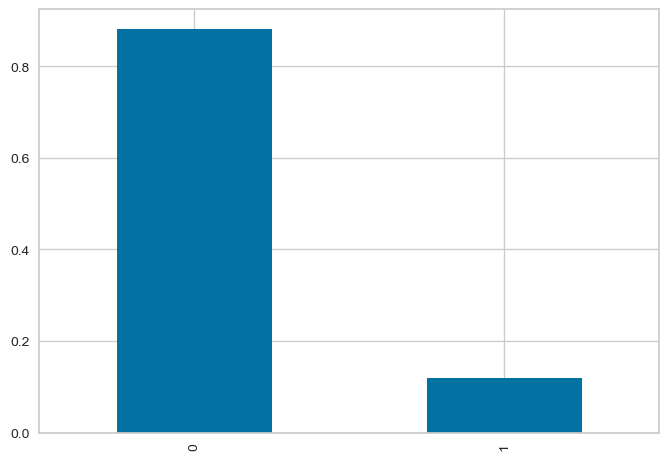

In [167]:
y_train.value_counts(normalize= True).plot.bar() ## data is imbalanced 

In [168]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

5616

In [169]:
from collections import Counter

print(sorted(Counter(y_resampled_smt).items()))

[(0, 2808), (1, 2808)]


<AxesSubplot:>

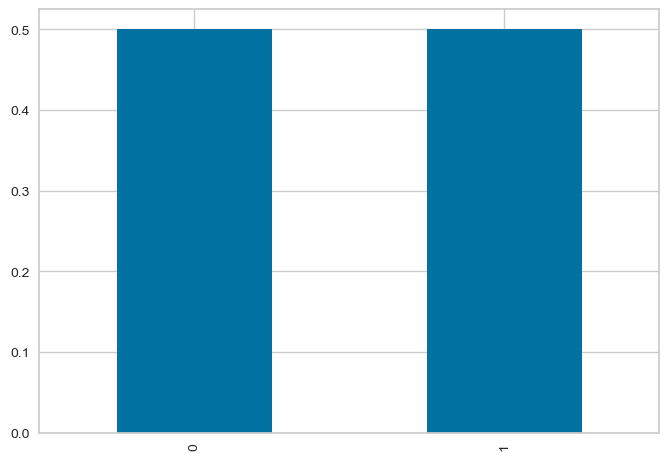

In [170]:
y_resampled_smt.value_counts(normalize= True).plot.bar() ## now the dataset is balanced 

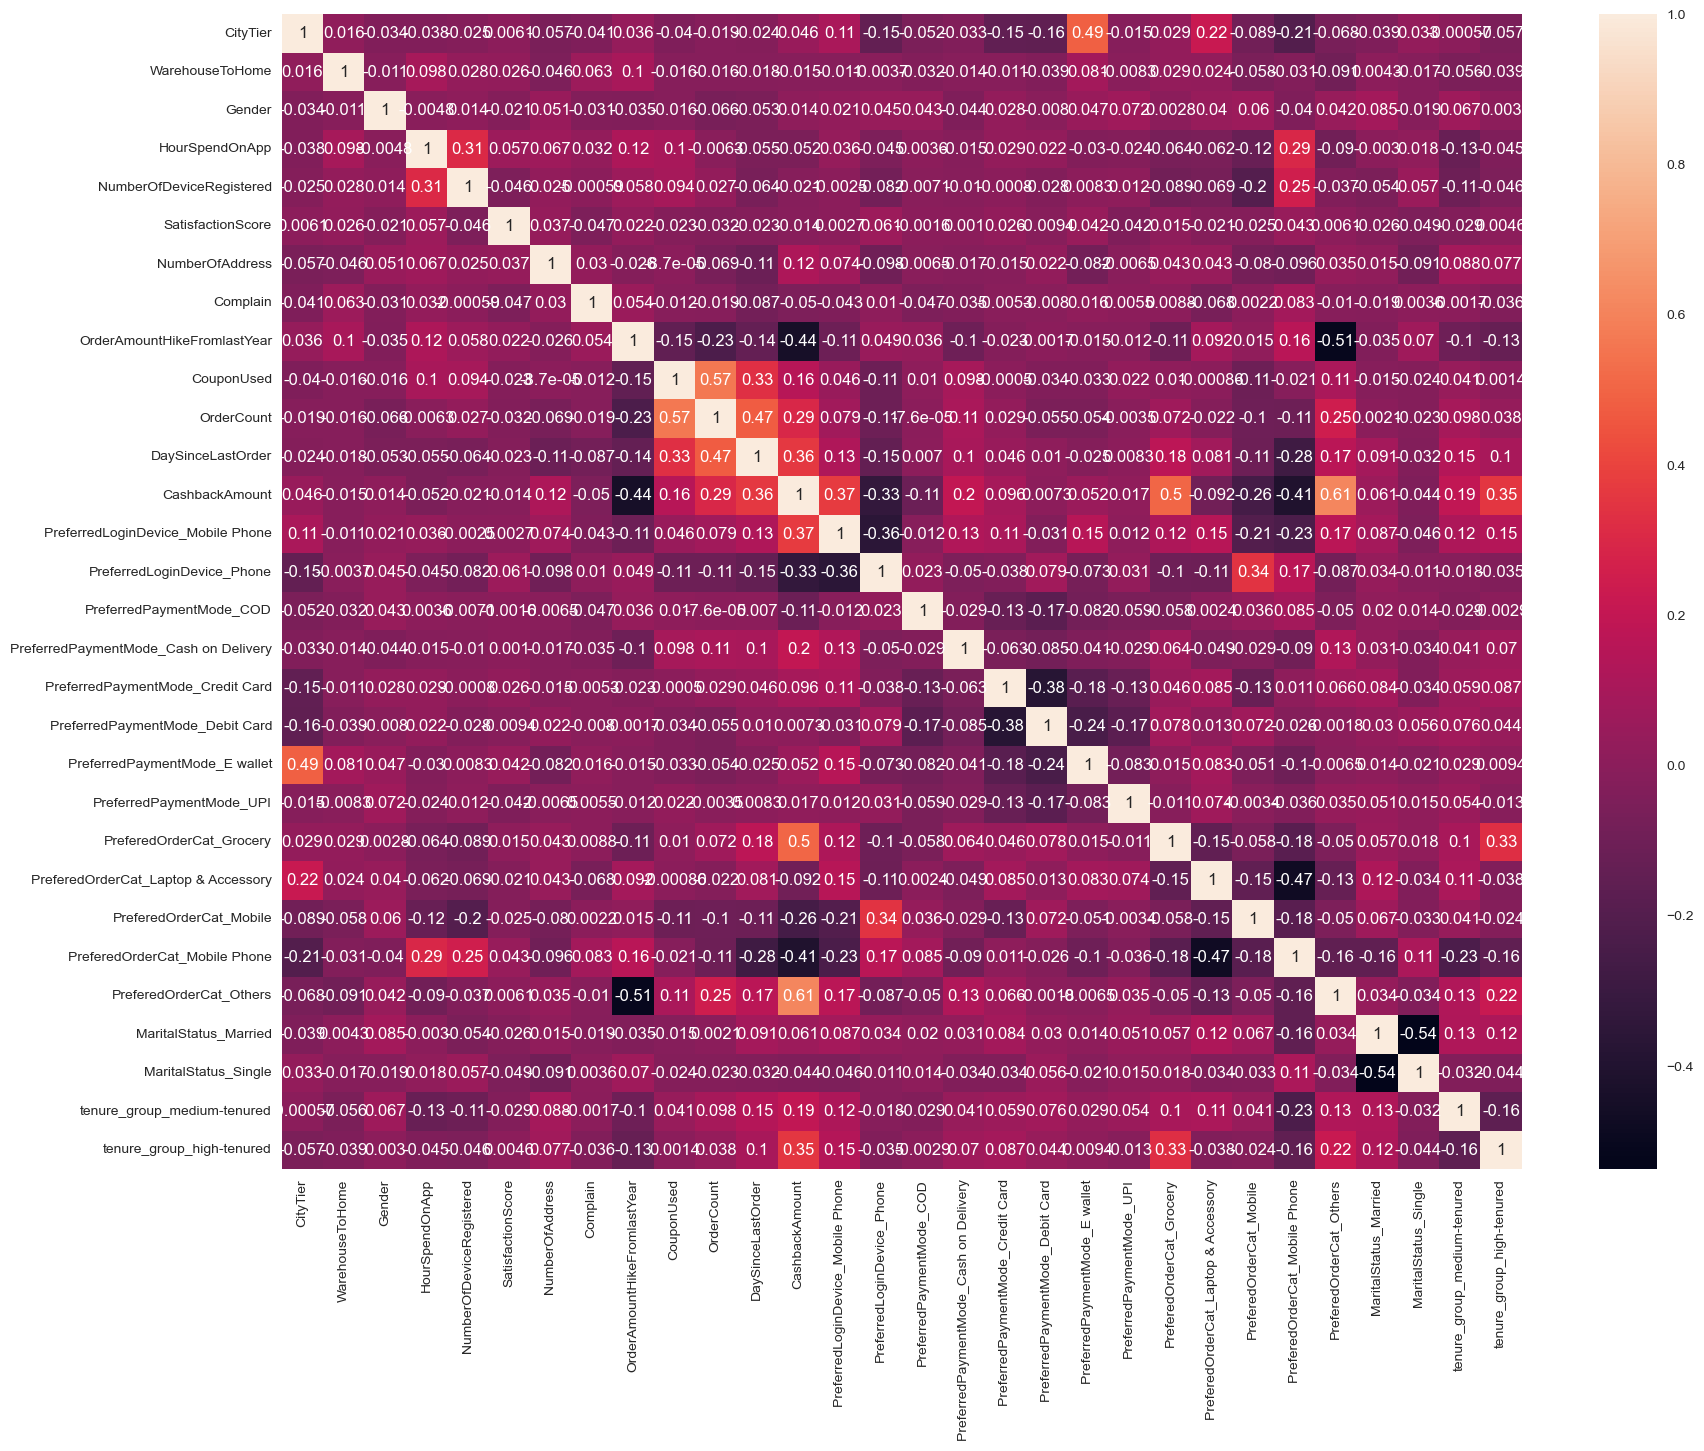

In [171]:
plt.figure(figsize = (20,15))
sns.heatmap(X_resampled_smt.corr(),annot = True)
plt.show()

In [172]:
import statsmodels.api as sm

# Logistic regression model

logm1 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5585
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1697.6
Date:                Tue, 06 Jun 2023   Deviance:                       3395.2
Time:                        01:54:30   Pearson chi2:                 6.19e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5424
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.6160      0.379      6.909      0.000       1.874       3.358
CityTier                                  0.2784      0.061      4.575      0.000       0.159       0.398
WarehouseToHome                           0.3141      0.046      6.867      0.000       0.224       0.404
Gender                                    0.0627      0.090      0.695      0.487      -0.114       0.240
HourSpendOnApp                           -0.1168      0.076     -1.536      0.125      -0.266       0.032
NumberOfDeviceRegistered                  0.3907      0.053      7.415      0.000       0.287       0.494
SatisfactionScore                         0.1532      0.035      4.436      0.000       0.086       0.221
NumberOfAddress                           0.2331      0.019     12.200      0.000       0.196       0.271
Complain                                  1.4191      0.097     14.563      0.000       1.228       1.610
OrderAmountHikeFromlastYear               0.0520      0.060      0.864      0.387      -0.066       0.170
CouponUsed                                0.0291      0.032      0.912      0.362      -0.033       0.092
OrderCount                                0.1465      0.022      6.696      0.000       0.104       0.189
DaySinceLastOrder                        -0.1739      0.017    -10.123      0.000      -0.208      -0.140
CashbackAmount                           -0.6626      0.124     -5.333      0.000      -0.906      -0.419
PreferredLoginDevice_Mobile Phone        -1.2091      0.102    -11.804      0.000      -1.410      -1.008
PreferredLoginDevice_Phone               -1.0204      0.138     -7.392      0.000      -1.291      -0.750
PreferredPaymentMode_COD                 -2.8168      0.254    -11.106      0.000      -3.314      -2.320
PreferredPaymentMode_Cash on Delivery    -3.6142      0.455     -7.948      0.000      -4.505      -2.723
PreferredPaymentMode_Credit Card         -3.3759      0.211    -15.984      0.000      -3.790      -2.962
PreferredPaymentMode_Debit Card          -3.2359      0.204    -15.894      0.000      -3.635      -2.837
PreferredPaymentMode_E wallet            -2.3904      0.237    -10.081      0.000      -2.855      -1.926
PreferredPaymentMode_UPI                 -3.4097      0.255    -13.368      0.000      -3.910      -2.910
PreferedOrderCat_Grocery                 -0.0140      0.306     -0.046      0.964      -0.614       0.586
PreferedOrderCat_Laptop & Accessory      -2.6691      0.156    -17.126      0.000      -2.975      -2.364
PreferedOrderCat_Mobile                  -3.8958      0.300    -12.996      0.000      -4.483      -3.308
PreferedOrderCat_Mobile Phone            -1.0902      0.179     -6.104      0.000      -1.440      -0.740
PreferedO

In [173]:
## Feature Elimination (RFE)


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [174]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [175]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [176]:
list(zip(X_resampled_smt.columns, rfe.support_, rfe.ranking_))

[('CityTier', False, 2),
 ('WarehouseToHome', True, 1),
 ('Gender', False, 11),
 ('HourSpendOnApp', False, 8),
 ('NumberOfDeviceRegistered', True, 1),
 ('SatisfactionScore', False, 7),
 ('NumberOfAddress', False, 3),
 ('Complain', True, 1),
 ('OrderAmountHikeFromlastYear', False, 9),
 ('CouponUsed', False, 10),
 ('OrderCount', False, 5),
 ('DaySinceLastOrder', False, 4),
 ('CashbackAmount', True, 1),
 ('PreferredLoginDevice_Mobile Phone', True, 1),
 ('PreferredLoginDevice_Phone', True, 1),
 ('PreferredPaymentMode_COD', True, 1),
 ('PreferredPaymentMode_Cash on Delivery', True, 1),
 ('PreferredPaymentMode_Credit Card', True, 1),
 ('PreferredPaymentMode_Debit Card', True, 1),
 ('PreferredPaymentMode_E wallet', True, 1),
 ('PreferredPaymentMode_UPI', True, 1),
 ('PreferedOrderCat_Grocery', False, 6),
 ('PreferedOrderCat_Laptop & Accessory', True, 1),
 ('PreferedOrderCat_Mobile', True, 1),
 ('PreferedOrderCat_Mobile Phone', True, 1),
 ('PreferedOrderCat_Others', True, 1),
 ('MaritalStatus_

In [177]:
list(zip(X_resampled_smt.columns, rfe.support_, rfe.ranking_))

[('CityTier', False, 2),
 ('WarehouseToHome', True, 1),
 ('Gender', False, 11),
 ('HourSpendOnApp', False, 8),
 ('NumberOfDeviceRegistered', True, 1),
 ('SatisfactionScore', False, 7),
 ('NumberOfAddress', False, 3),
 ('Complain', True, 1),
 ('OrderAmountHikeFromlastYear', False, 9),
 ('CouponUsed', False, 10),
 ('OrderCount', False, 5),
 ('DaySinceLastOrder', False, 4),
 ('CashbackAmount', True, 1),
 ('PreferredLoginDevice_Mobile Phone', True, 1),
 ('PreferredLoginDevice_Phone', True, 1),
 ('PreferredPaymentMode_COD', True, 1),
 ('PreferredPaymentMode_Cash on Delivery', True, 1),
 ('PreferredPaymentMode_Credit Card', True, 1),
 ('PreferredPaymentMode_Debit Card', True, 1),
 ('PreferredPaymentMode_E wallet', True, 1),
 ('PreferredPaymentMode_UPI', True, 1),
 ('PreferedOrderCat_Grocery', False, 6),
 ('PreferedOrderCat_Laptop & Accessory', True, 1),
 ('PreferedOrderCat_Mobile', True, 1),
 ('PreferedOrderCat_Mobile Phone', True, 1),
 ('PreferedOrderCat_Others', True, 1),
 ('MaritalStatus_

In [178]:
col = X_resampled_smt.columns[rfe.support_]

In [179]:
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5595
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1880.2
Date:                Tue, 06 Jun 2023   Deviance:                       3760.4
Time:                        01:54:33   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5116
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.9944      0.263     15.212      0.000       3.480       4.509
WarehouseToHome                           0.2669      0.042      6.390      0.000       0.185       0.349
NumberOfDeviceRegistered                  0.3604      0.046      7.784      0.000       0.270       0.451
Complain                                  1.4308      0.092     15.518      0.000       1.250       1.611
CashbackAmount                           -0.6062      0.095     -6.365      0.000      -0.793      -0.420
PreferredLoginDevice_Mobile Phone        -1.0018      0.095    -10.589      0.000      -1.187      -0.816
PreferredLoginDevice_Phone               -1.0245      0.130     -7.888      0.000      -1.279      -0.770
PreferredPaymentMode_COD                 -3.0260      0.236    -12.825      0.000      -3.488      -2.564
PreferredPaymentMode_Cash on Delivery    -3.8748      0.408     -9.493      0.000      -4.675      -3.075
PreferredPaymentMode_Credit Card         -3.5483      0.197    -17.978      0.000      -3.935      -3.162
PreferredPaymentMode_Debit Card          -3.3129      0.189    -17.518      0.000      -3.684      -2.942
PreferredPaymentMode_E wallet            -2.2953      0.209    -10.959      0.000      -2.706      -1.885
PreferredPaymentMode_UPI                 -3.4762      0.238    -14.584      0.000      -3.943      -3.009
PreferedOrderCat_Laptop & Accessory      -2.2925      0.139    -16.459      0.000      -2.565      -2.019
PreferedOrderCat_Mobile                  -3.7720      0.279    -13.532      0.000      -4.318      -3.226
PreferedOrderCat_Mobile Phone            -0.8551      0.154     -5.535      0.000      -1.158      -0.552
PreferedOrderCat_Others                   1.4770      0.288      5.121      0.000       0.912       2.042
MaritalStatus_Married                    -1.8037      0.105    -17.147      0.000      -2.010      -1.598
MaritalStatus_Single                     -0.6413      0.106     -6.064      0.000      -0.849      -0.434
tenure_group_medium-tenured              -1.6708      0.112    -14.964      0.000      -1.890      -1.452
tenure_group_high-tenured                -4.6858      0.406    -11.552      0.000      -5.481      -3.891
=========================================================================================================
"""

In [180]:
X_resampled_smt.columns[~rfe.support_]

Index(['CityTier', 'Gender', 'HourSpendOnApp', 'SatisfactionScore',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'PreferedOrderCat_Grocery'],
      dtype='object')

In [181]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [182]:
list(zip(X_resampled_smt.columns, rfe.support_, rfe.ranking_))

[('CityTier', True, 1),
 ('WarehouseToHome', True, 1),
 ('Gender', False, 6),
 ('HourSpendOnApp', False, 3),
 ('NumberOfDeviceRegistered', True, 1),
 ('SatisfactionScore', False, 2),
 ('NumberOfAddress', True, 1),
 ('Complain', True, 1),
 ('OrderAmountHikeFromlastYear', False, 4),
 ('CouponUsed', False, 5),
 ('OrderCount', True, 1),
 ('DaySinceLastOrder', True, 1),
 ('CashbackAmount', True, 1),
 ('PreferredLoginDevice_Mobile Phone', True, 1),
 ('PreferredLoginDevice_Phone', True, 1),
 ('PreferredPaymentMode_COD', True, 1),
 ('PreferredPaymentMode_Cash on Delivery', True, 1),
 ('PreferredPaymentMode_Credit Card', True, 1),
 ('PreferredPaymentMode_Debit Card', True, 1),
 ('PreferredPaymentMode_E wallet', True, 1),
 ('PreferredPaymentMode_UPI', True, 1),
 ('PreferedOrderCat_Grocery', True, 1),
 ('PreferedOrderCat_Laptop & Accessory', True, 1),
 ('PreferedOrderCat_Mobile', True, 1),
 ('PreferedOrderCat_Mobile Phone', True, 1),
 ('PreferedOrderCat_Others', True, 1),
 ('MaritalStatus_Married

In [183]:
col = X_resampled_smt.columns[rfe.support_]

In [184]:
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5590
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1708.8
Date:                Tue, 06 Jun 2023   Deviance:                       3417.6
Time:                        01:54:36   Pearson chi2:                 5.94e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5406
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.8767      0.326      8.816      0.000       2.237       3.516
CityTier                                  0.2741      0.061      4.529      0.000       0.155       0.393
WarehouseToHome                           0.3131      0.045      6.957      0.000       0.225       0.401
NumberOfDeviceRegistered                  0.3647      0.051      7.139      0.000       0.265       0.465
NumberOfAddress                           0.2364      0.019     12.504      0.000       0.199       0.273
Complain                                  1.4081      0.097     14.499      0.000       1.218       1.598
OrderCount                                0.1516      0.019      8.085      0.000       0.115       0.188
DaySinceLastOrder                        -0.1704      0.017    -10.090      0.000      -0.203      -0.137
CashbackAmount                           -0.6850      0.124     -5.527      0.000      -0.928      -0.442
PreferredLoginDevice_Mobile Phone        -1.2231      0.102    -11.985      0.000      -1.423      -1.023
PreferredLoginDevice_Phone               -0.9753      0.137     -7.132      0.000      -1.243      -0.707
PreferredPaymentMode_COD                 -2.7515      0.251    -10.971      0.000      -3.243      -2.260
PreferredPaymentMode_Cash on Delivery    -3.5748      0.450     -7.948      0.000      -4.456      -2.693
PreferredPaymentMode_Credit Card         -3.3313      0.209    -15.933      0.000      -3.741      -2.922
PreferredPaymentMode_Debit Card          -3.2000      0.201    -15.881      0.000      -3.595      -2.805
PreferredPaymentMode_E wallet            -2.3016      0.234     -9.826      0.000      -2.761      -1.842
PreferredPaymentMode_UPI                 -3.3767      0.252    -13.400      0.000      -3.871      -2.883
PreferedOrderCat_Grocery                  0.0611      0.304      0.201      0.840      -0.534       0.656
PreferedOrderCat_Laptop & Accessory      -2.6616      0.155    -17.184      0.000      -2.965      -2.358
PreferedOrderCat_Mobile                  -3.9145      0.298    -13.124      0.000      -4.499      -3.330
PreferedOrderCat_Mobile Phone            -1.1066      0.174     -6.369      0.000      -1.447      -0.766
PreferedOrderCat_Others                   1.5150      0.368      4.117      0.000       0.794       2.236
MaritalStatus_Married                    -1.8015      0.111    -16.193      0.000      -2.020      -1.583
MaritalStatus_Single                     -0.4839      0.112     -4.330      0.000      -0.703      -0.265
tenure_group_medium-tenured              -1.9478      0.122    -15.912      0.000      -2.188      -1.708
tenure_group_high-tenured                -5.2351      0.427    -12.259      0.000      -6.072      -4.398
=========

In [185]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.132014
1    0.654030
2    0.624213
3    0.002985
4    0.148803
5    0.669123
6    0.014022
7    0.478542
8    0.003351
9    0.137537
dtype: float64

In [186]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13201385, 0.65402993, 0.62421341, 0.0029851 , 0.14880284,
       0.66912292, 0.01402168, 0.47854201, 0.00335098, 0.13753673])

In [187]:
y_train_pred_final = pd.DataFrame({'Churn':y_resampled_smt.values, 'Churn_Prob':y_train_pred})

y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.132014
1      1    0.654030
2      0    0.624213
3      0    0.002985
4      0    0.148803

In [188]:
## lets assume a random cutoff of 0.5 and assign predicted 

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.132014          0
1      1    0.654030          1
2      0    0.624213          1
3      0    0.002985          0
4      0    0.148803          0

In [189]:
from sklearn import metrics

In [190]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[2434  374]
 [ 359 2449]]


In [191]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8694800569800569


In [192]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [193]:
# Sensitivity
TP / float(TP+FN)

0.8721509971509972

In [194]:
# Specificity
TN / float(TN+FP)

0.8668091168091168

In [195]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13319088319088318


In [196]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8675168260715551


In [197]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8714643752237737


In [198]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [199]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

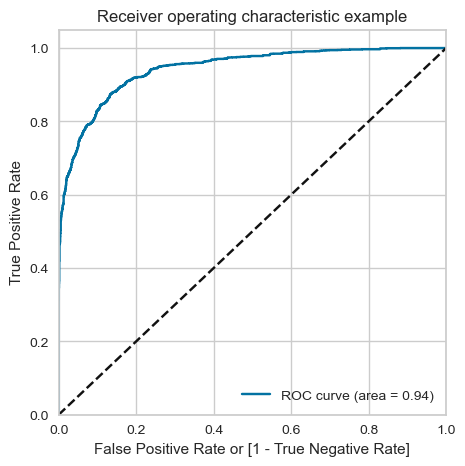

In [200]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [201]:
## finding the ideal cutoff point 

# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.132014          0    1    1    0    0    0    0    0    0    0   
1      1    0.654030          1    1    1    1    1    1    1    1    0    0   
2      0    0.624213          1    1    1    1    1    1    1    1    0    0   
3      0    0.002985          0    1    0    0    0    0    0    0    0    0   
4      0    0.148803          0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [202]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.753383  0.976140  0.530627
0.2   0.2  0.816239  0.957977  0.674501
0.3   0.3  0.848825  0.943732  0.753917
0.4   0.4  0.864494  0.911325  0.817664
0.5   0.5  0.869480  0.872151  0.866809
0.6   0.6  0.860933  0.816952  0.904915
0.7   0.7  0.850783  0.759972  0.941595
0.8   0.8  0.816774  0.661325  0.972222
0.9   0.9  0.777244  0.564815  0.989672


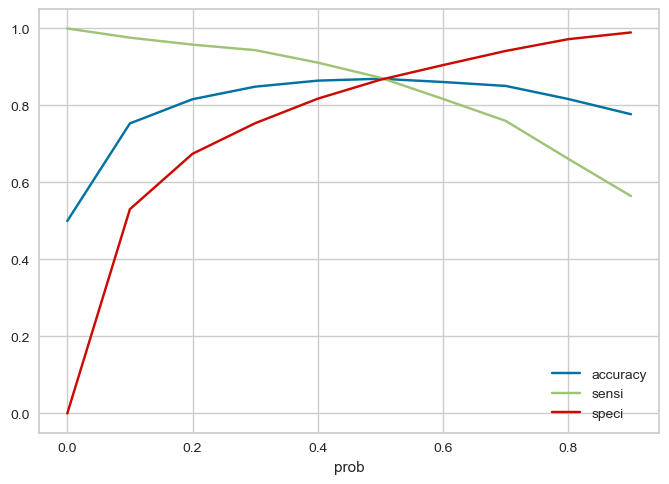

In [203]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**As per the plot 0.5 is the ideal cutoff point**

Previously, we took 0.5 cutoffs as arbitary point , but actually the cutoff is 0.5, so not calculating the confusion matrix again 

In [204]:
# Making predictions on the test set

X_test[['CashbackAmount','OrderAmountHikeFromlastYear','WarehouseToHome']] = scaler.transform(X_test[['CashbackAmount','OrderAmountHikeFromlastYear','WarehouseToHome']])

In [205]:
X_test = X_test[col]
X_test.head()

CityTier  WarehouseToHome  NumberOfDeviceRegistered  NumberOfAddress  \
780          1        -1.167404                         4              4.0   
1896         2        -0.795662                         1             10.0   
5621         3         2.426101                         5              6.0   
2612         3         0.071736                         3              2.0   
1926         1        -1.167404                         5              4.0   

      Complain  OrderCount  DaySinceLastOrder  CashbackAmount  \
780          0           1                  7        1.590878   
1896         0           3                  6       -0.352145   
5621         1           0                  1        1.050036   
2612         1           1                  7       -0.832893   
1926         0           1                  2       -0.872955   

      PreferredLoginDevice_Mobile Phone  PreferredLoginDevice_Phone  \
780                                   1                           0   
1896                                  1                           0   
5621                                  1                           0   
2612                                  0                           0   
1926                                  0                           1   

      PreferredPaymentMode_COD  PreferredPaymentMode_Cash on Delivery  \
780                          0                                      0   
1896                         0                                      0   
5621                         0                                      0   
2612                         0                                      0   
1926                         0                                      0   

      PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
780                                  0                                1   
1896                                 0                                0   
5621                                 0                                0   
2612                                 0                                1   
1926                                 0                                1   

      PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  \
780                               0                         0   
1896                              0                         1   
5621                              1                         0   
2612                              0                         0   
1926                              0                         0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
780                          1                                    0   
1896                         0                                    1   
5621                         0                                    0   
2612                         0                                    1   
1926                         0                                    0   

      PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
780                         0                              0   
1896                        0                              0   
5621                        0                              0   
2612                        0                              0   
1926                        0                              1   

      PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
780                         0                      1                     0   
1896                        0                      1                     0   
5621                        0                      1                     0   
2612                        0                      1                     0   
1926                        0                      1                     0   

      tenure_group_medium-tenured  tenure_group_high-tenured  
780                             0                          0  
1896                           

In [206]:
len(X_test.columns)

25

In [207]:
X_test_sm = sm.add_constant(X_test)

In [208]:
# Prediction 

y_test_pred = res.predict(X_test_sm)

In [209]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [210]:
# Let's see the head
y_pred_1.head()

0
780   0.042930
1896  0.004355
5621  0.720145
2612  0.192007
1926  0.246056

In [211]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [212]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [213]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [214]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [215]:
y_pred_final.head()

Churn  Churn_Prob  final_predicted
780       0    0.042930                0
1896      0    0.004355                0
5621      1    0.720145                1
2612      0    0.192007                0
1926      0    0.246056                0

In [216]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8361375274323336

In [217]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1037,  168],
       [  56,  106]], dtype=int64)

In [218]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [219]:
# Sensitivity
TP / float(TP+FN)

0.654320987654321

In [220]:
# Specificity
TN / float(TN+FP)

0.8605809128630706

In [221]:
# Precision

precision = confusion2[1,1]/(confusion2[1,1] + confusion2[0,1])

In [222]:
# Recall 

recall = confusion2[1,1]/(confusion2[1,1] + confusion2[1,0])

In [223]:
F1 = (2* precision * recall )/(precision + recall)
print(F1)

0.4862385321100917
